In [1]:
import os
import sys
import time
import calendar
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy as sp
from scipy import stats
import tensorflow as tf

# from my_lib.field_config import data_encoder

# Setup

In [2]:
!pwd

/Users/kylenickerson/Desktop/verafin_proj_big/ecmlkdd/code_uk_shortseq/metrics-final


In [3]:
# ds_suffix = "vf10k"
ds_suffix = "-czech"
# max_seq_len = 80
# min_seq_len = 20

In [4]:
good_results = ['generated_data/gen_v2b__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'generated_data/tg_0-hd_24-nl_4-bs_64--len_20.csv',
'generated_data/dg_data_new.csv']

    
 # 'generated_data/gen_v2b-nd__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 # 'generated_data/gen_v2b-nc__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 # 'generated_data/gen_v2b-v__nld_4-dm_128-nh_2-i_2-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',


# gen_ds_file = "generated_data/h-gen_v2b__nld_4-dm_128-nh_2-i_0-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_80-v2.csv"
# fgen_file = "generated_data/f-czech-700__epoch-1000_bs-200_lr-g0005-d0005-a0005_epoch_id-299.csv"
# tg_file = "generated_data/h-gtg_0-hd_24-nl_4-bs_32--len_80.csv"

# gen_ds_file = []
gen_ds_file, fgen_file, tg_file = good_results

gen_ds_file = "generated_data/sqrt-log_var__gen_v2b__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64-len_25-v2.csv"

gen_df = pd.read_csv(gen_ds_file, parse_dates=["date"])
gen_df["datetime"] = gen_df["date"]
gen_df

,Unnamed: 0,amount,description_num,flag_num,type_num,days_passed,age,date,hours,minutes,seconds,description,flag,type,account_id,tcode,datetime,td,raw_amount
0,0,19.95,18,1,0,0,-1,2017-04-13,10,0,0,BT Mobile,Subscription,Debit,0,BT Mobile__Subscription__Debit,2017-04-13,0,-19.95
1,1,22653.10,24,2,1,2,-1,2017-04-15,9,44,57,Monthly,Income,Credit,0,Monthly__Income__Credit,2017-04-15,2,22653.10
2,2,1.28,1,0,0,2,-1,2017-04-17,7,0,0,Water Bill,Utility Bill,Debit,0,Water Bill__Utility Bill__Debit,2017-04-17,2,-1.28
3,3,0.53,41,4,0,1,-1,2017-04-18,17,0,49,Groceries - Food & Drinks,Card Transaction,Debit,0,Groceries - Food & Drinks__Card Transaction__D...,2017-04-18,1,-0.53
4,4,41.33,33,4,0,1,-1,2017-04-19,15,19,26,Public Transport,Card Transaction,Debit,0,Public Transport__Card Transaction__Debit,2017-04-19,1,-41.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,124995,8.62,41,4,0,0,-1,2017-04-20,17,17,15,Groceries - Food & Drinks,Card Transaction,Debit,4999,Groceries - Food & Drinks__Card Transaction__D...,2017-04-20,0,-8.62
124996,124996,13.84,41,4,0,0,-1,2017-04-20,18,35,44,Groceries - Food & Drinks,Card Transaction,Debit,4999,Groceries - Food & Drinks__Card Transaction__D...,2017-04-20,0,-13.84
124997,124997,26.37,42,0,0,0,-1,2017-04-20,18,0,0,Gas Station - Car Fuel,Utility Bill,Debit,4999,Gas Station - Car Fuel__Utility Bill__Debit,2017-04-20,0,-26.37
124998,124998,10.96,5,0,0,0,-1,2017-04-20,14,0,0,Energy,Utility Bill,Debit,4999,Energy__Utility Bill__Debit,2017-04-20,0,-10.96


In [5]:
real_df = pd.read_csv(f"real_data/final_df--uk.csv", parse_dates=["datetime"])
real_df["days_passed"] = real_df["td"]
real_df

,unnamed: 0,index,account_id,amount,balance,date,description,flag,id,type,...,datetime,month,day,dow,year,dtme,tcode,td,raw_amount,days_passed
0,28979,0,0014d0ef29aa9f93,-45.66,228.34,2017-04-24 11:00:00.000000,Energy,Utility Bill,38a21d894127b49d,Debit,...,2017-04-24 11:00:00,4,24,0,2017,6,Energy__Utility Bill__Debit,0.0,-45.66,0.0
1,30006,1,0014d0ef29aa9f93,2842.27,3070.61,2017-04-24 17:36:55.000000,Monthly,Income,3941e50e4613a49a,Credit,...,2017-04-24 17:36:55,4,24,0,2017,6,Monthly__Income__Credit,0.0,2842.27,0.0
2,32220,2,0014d0ef29aa9f93,-167.25,2903.36,2017-04-25 16:00:00.000000,Credit Card Payment,Credit Card,c09e8105dcfc85b7,Debit,...,2017-04-25 16:00:00,4,25,1,2017,5,Credit Card Payment__Credit Card__Debit,0.0,-167.25,0.0
3,35526,3,0014d0ef29aa9f93,-40.58,2862.78,2017-04-27 16:00:00.000000,Water Bill,Utility Bill,81e4ffc8df86920e,Debit,...,2017-04-27 16:00:00,4,27,3,2017,3,Water Bill__Utility Bill__Debit,2.0,-40.58,2.0
4,94259,4,0014d0ef29aa9f93,-43.16,2819.62,2017-05-23 17:00:00.000000,Energy,Utility Bill,c0ddd8f8a923d40f,Debit,...,2017-05-23 17:00:00,5,23,1,2017,8,Energy__Utility Bill__Debit,26.0,-43.16,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,89757,23,ffd5620bcbf69023,-34.82,2107.16,2017-05-20 15:50:57.000000,Shopping - Household Goods,Card Transaction,908ac96c72f6c3b7,Debit,...,2017-05-20 15:50:57,5,20,5,2017,11,Shopping - Household Goods__Card Transaction__...,0.0,-34.82,0.0
99996,91385,24,ffd5620bcbf69023,-36.50,2070.66,2017-05-22 08:00:00.000000,Water Bill,Utility Bill,66d16692309a0738,Debit,...,2017-05-22 08:00:00,5,22,0,2017,9,Water Bill__Utility Bill__Debit,1.0,-36.50,1.0
99997,91449,25,ffd5620bcbf69023,-38.13,2032.53,2017-05-22 09:00:00,Energy,Utility Bill,b71e06b7164af1e3,Debit,...,2017-05-22 09:00:00,5,22,0,2017,9,Energy__Utility Bill__Debit,0.0,-38.13,0.0
99998,93444,26,ffd5620bcbf69023,-42.59,1989.94,2017-05-22 20:47:15,Bar/Pub,Card Transaction,8a28f7eeff2dbabb,Debit,...,2017-05-22 20:47:15,5,22,0,2017,9,Bar/Pub__Card Transaction__Debit,0.0,-42.59,0.0


In [6]:
real_df.tcode = real_df.tcode.apply(lambda x: x.replace("$  $", "--"))

In [7]:
gen_df.tcode = gen_df.tcode.apply(lambda x: x.replace("$  $", "--"))

In [8]:


real_df["Amount"] = real_df.amount
real_df.amount = real_df.amount.apply(abs)


In [9]:
def describe(x):
    fns = ["mean", "median", "std", "min", "max"]
    for fn in fns:
        val = eval(f"np.{fn}(x)")
        print(f"{fn} is {val:.2f},", end="\t")
        
    fn = "log_abs_mean" 
    val = np.mean(np.log10(np.abs(x)+1.))
    print(f"{fn} is {val:.2f},")


In [10]:

fgen_df = pd.read_csv(fgen_file, parse_dates=["datetime"])
fgen_df["tcode"] = fgen_df.tcode.apply(lambda x: x.replace("---", "--"))
fgen_df.tcode.unique()

array(['Mortgage__Utility Bill__Debit', 'Monthly__Income__Credit',
       'Credit Card Payment__Credit Card__Debit',
       'Energy__Utility Bill__Debit', 'Water Bill__Utility Bill__Debit',
       'Groceries - Food & Drinks__Card Transaction__Debit',
       'Public Transport__Card Transaction__Debit',
       'Virgin Media Broadband__Utility Bill__Debit',
       'Restaurant__Card Transaction__Debit',
       'Bar/Pub__Card Transaction__Debit',
       'KCOM Broadband__Utility Bill__Debit',
       'Post Office Broadband__Utility Bill__Debit'], dtype=object)

In [11]:
fgen_df.columns

Index(['tcode_num', 'td', 'amount', 'age', 'account_id', 'datetime', 'tcode',
       'description', 'flag', 'type', 'raw_amount'],
      dtype='object')

In [12]:

tg_df = pd.read_csv(tg_file, parse_dates=['datetime'])
tg_df["days_passed"] = tg_df["td"]
# tg_df["tcode"] = fgen_df.tcode.apply(lambda x: x.replace("---", "--"))
tg_df

,Unnamed: 0,tcode,amount,balance,dif,account_id,date,month,day,dow,...,dtme,td,type,flag,description,amount_1,raw_amount,balance_raw,datetime,days_passed
0,497300,BT Mobile__Utility Bill__Debit,5.626430,2.617375,0.037105,4973.0,2017-04-30 00:00:00.000000000,4,30,6,...,0,0.0,Debit,Utility Bill,BT Mobile,-5.626430,-5.626430,413.357511,2017-04-30 00:00:00.000000000,0.0
1,357200,O2 Mobile__Utility Bill__Debit,128.154131,2.430582,0.026566,3572.0,2017-05-15 00:00:00.000000000,5,15,0,...,16,0.0,Debit,Utility Bill,O2 Mobile,-128.154131,-128.154131,268.514678,2017-05-15 00:00:00.000000000,0.0
2,440900,Water Bill__Utility Bill__Debit,189.909265,2.402843,0.047426,4409.0,2017-05-01 00:00:00.000000000,5,1,0,...,30,0.0,Debit,Utility Bill,Water Bill,-189.909265,-189.909265,251.838463,2017-05-01 00:00:00.000000000,0.0
3,96700,BT Broadband__Utility Bill__Debit,73.333238,2.624279,0.060581,967.0,2017-04-25 00:43:44.155315200,4,25,1,...,5,0.0,Debit,Utility Bill,BT Broadband,-73.333238,-73.333238,419.996855,2017-04-25 00:43:44.155315200,0.0
4,96701,Rent__Utility Bill__Debit,118.477428,2.624279,0.114571,967.0,2017-05-14 00:00:00.000000000,5,14,6,...,17,18.0,Debit,Utility Bill,Rent,-118.477428,-118.477428,419.996855,2017-05-14 00:00:00.000000000,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95223,272443,Groceries - Food & Drinks__Card Transaction__D...,87.247266,2.655538,0.355961,2724.0,2017-05-16 04:51:56.995632000,5,16,1,...,15,1.0,Debit,Card Transaction,Groceries - Food & Drinks,-87.247266,-87.247266,451.416139,2017-05-16 04:51:56.995632000,1.0
95224,272444,Monthly__Income__Credit,20.894705,2.655538,0.178805,2724.0,2017-05-17 01:09:41.800694400,5,17,2,...,14,0.0,Credit,Income,Monthly,20.894705,20.894705,451.416139,2017-05-17 01:09:41.800694400,0.0
95225,272445,Groceries - Food & Drinks__Card Transaction__D...,331.457402,2.655538,0.123625,2724.0,2017-05-17 15:11:38.418028800,5,17,2,...,14,0.0,Debit,Card Transaction,Groceries - Food & Drinks,-331.457402,-331.457402,451.416139,2017-05-17 15:11:38.418028800,0.0
95226,272446,Vodafone Mobile__Utility Bill__Debit,347.730192,2.655538,0.065554,2724.0,2017-05-17 22:38:05.846553600,5,17,2,...,14,0.0,Debit,Utility Bill,Vodafone Mobile,-347.730192,-347.730192,451.416139,2017-05-17 22:38:05.846553600,0.0


## Setup

In [14]:



def compare_distributions(tables, labels):

    # fig, ax = plt.subplots(1, 3, )

    # bars = ["tcode"]
    width = 0.25
    bins = 50
    eps = 1

    col = "tcode"
    uniq = real_df[col].unique()

    plt_dp = True
    for t in tables:
        if "days_passed" not in t: plt_dp = False
                
                
    if plt_dp:
        fig, ax = plt.subplots(1,4, figsize=(20,5))
    else:
        fig, ax = plt.subplots(1,3, figsize=(18,5))

    for t_i, (table, plt_lbl) in enumerate(zip(tables, labels)):

        counts = []
        lbls = []

        for j, val in enumerate(uniq):

            l = sum(table[col] == val)
            counts.append(l)
            lbls.append(val)

    #     for count, lbl in zip(counts, lbls):

        x = np.arange(len(lbls)) + t_i*width # the label locations
        ps = [x/sum(counts) for x in counts]
        rects1 = ax[0].bar(x - width/2, ps, width, align="edge", label=plt_lbl)


        ax[0].set_xticks(x)
        ax[0].set_xticklabels(lbls, rotation=75)
        ax[0].set_title("Tcode Frequency")


        ax[1].hist(table["amount"], bins=bins, density=True, alpha=0.5, label=plt_lbl)
        ax[1].set_title("Amounts Distribution")

        log_amts = table["amount"]+eps
        log_amts[log_amts<eps] = eps
        
        ax[2].hist(np.log10(log_amts), bins=bins, density=True, alpha=0.5, label=plt_lbl)
        ax[2].set_title("Log Amounts Distribution")
        
        if plt_dp:
            ax[3].hist(table["days_passed"], bins=50, range=(0,50), label=plt_lbl, alpha=0.5, density=True)
            ax[3].set_title("Days passed Distribution (<50)")
          

    for a in ax:
        a.legend()

    plt.show()
    
    

def plot_time_heatmap(df, log = False, eps = 1., showbig=False, show_by_month = True, print_info = False):

    rows = end.year - start.year +1
    cols = 365

    hm = np.zeros((rows, cols))
    leap_year_trs = 0.
    past_end_trs = 0.
    
    
    if not "datetime" in df:
#         print()
        df["datetime"] = parse_date(df["date"])
        

    for date in df["datetime"]:
        r = date.year - start.year

        try:
            c = datetime.date(1993, date.month, date.day) - datetime.date(1993, 1, 1)  # treat all years as non-leap
            c = c.days

            hm[r,c] += 1.
        except:
            if date.day == 29 and date.month == 2:
                leap_year_trs += 1
            elif date.year > end.year:
                past_end_trs += 1
            else:
                raise Exception(f"Failed with: {date}")
            
    if log:
        hm = np.log10(hm + eps)
 
    if print_info:
        print(f"{leap_year_trs} on Feb 29th")
        print(f"{past_end_trs} past 1998")
        
    if showbig:
        plt.figure(figsize=(20,5))
        plt.matshow(hm, fignum=1, aspect='auto') 
        plt.show()
    
    if not show_by_month: 
        return hm
    
    r = 4
    c = 3

    fig, ax = plt.subplots(r, c, figsize=(18, 8))

    start_i = 0

    for month in range(1, 13):

        end_i = start_i + calendar.monthrange(1, month)[1] # non-leap year

        ax[(month-1)//c, (month-1)%c].matshow(hm[:, start_i:end_i], aspect="auto")
        ax[(month-1)//c, (month-1)%c].set_title(calendar.month_name[month])
        start_i = end_i


    plt.tight_layout()
    plt.show()    
    
    return hm


def plt_tr_density_by_time(hms, labels):
    
    plt.figure(figsize=(18,5))  
    
    for t_i, (hm, plt_lbl) in enumerate(zip(hms, labels)):
        
        plt.plot(np.sum(hm, axis=0)/np.sum(hm), label=plt_lbl)

 

start, end = real_df["datetime"].min().date(), real_df["datetime"].max().date()
print("start, end = ", start, end)
ALL_DAYS = [start + datetime.timedelta(i) for i in range((end - start).days)]

start, end =  2017-04-01 2017-05-25


# Compare Times
Note: This isn't included in paper

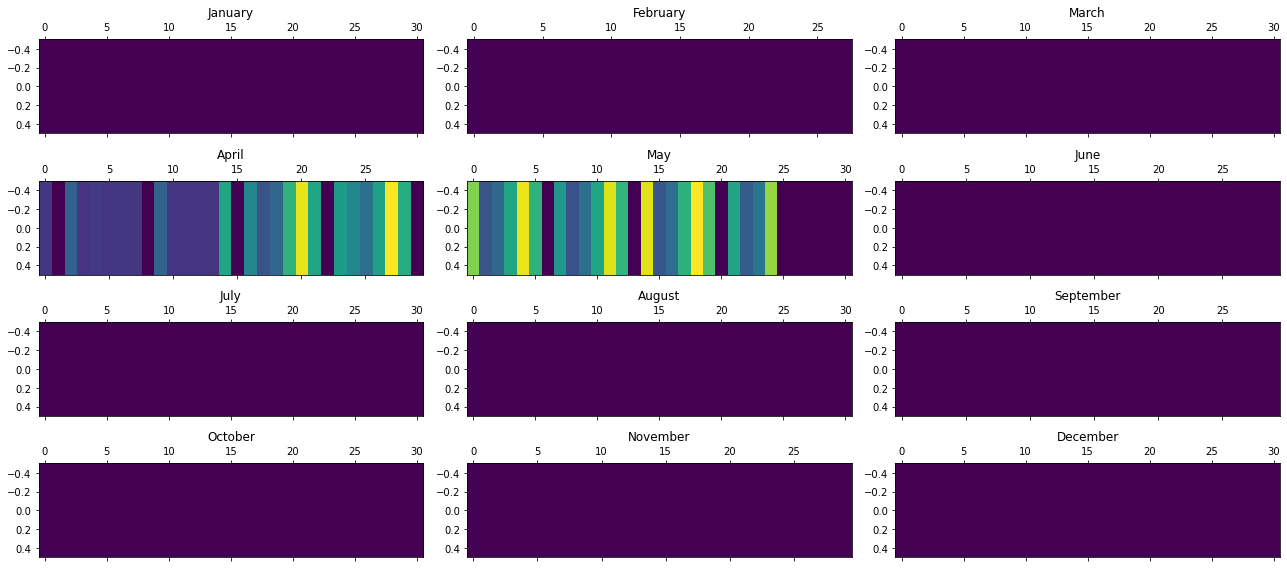

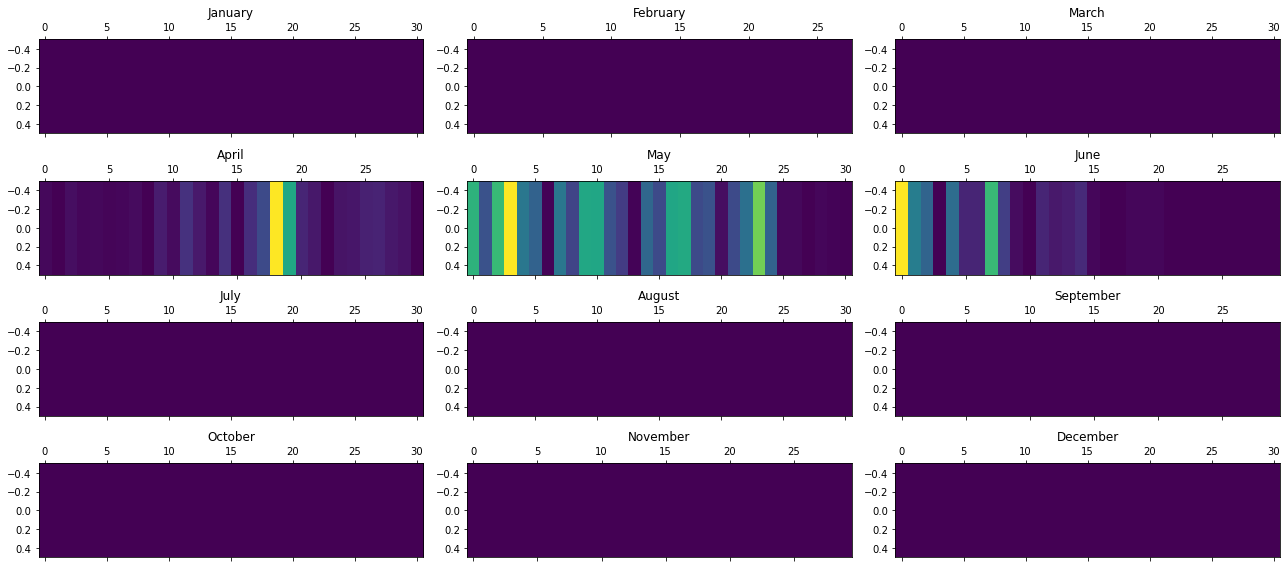

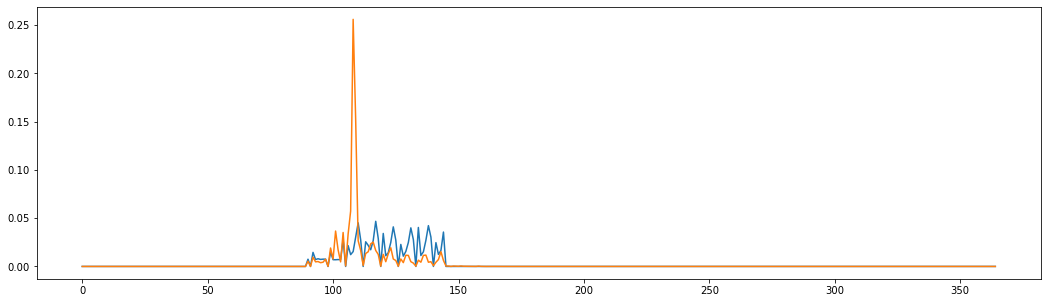

In [15]:
hm_real = plot_time_heatmap(real_df)
# compare_distributions(tables= [real_df, gen_df], labels=["Real", "Gen"])
hm_gen = plot_time_heatmap(gen_df)
plt_tr_density_by_time([hm_real, hm_gen], ["Real", "Gen"])
plt.show()

In [16]:
real_df.date.min(), real_df.date.max()

('2017-04-01 06:00:00.000000', '2017-05-25 20:00:00.000000')

# PCA

## Setup

required fields = ["tcode", "amount", "account_id", "days_passed", "age" ] 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# unique_tcodes = real_df.tcode.unique().tolist()
# tcode_to_num = lambda x: unique_tcodes.index(x)

# tcode_nums_r = real_df["tcode"].apply(tcode_to_num)
# tcode_nums_g = gen_df["tcode"].apply(tcode_to_num)

In [19]:
x = y = 4
x, y

(4, 4)

In [20]:
# tcode_order = np.array(list(set(list(real_df.tcode.unique())  + list(gen_df.tcode.unique()))))

# set(fgen_df.tcode.unique())

s = set()
for df in [real_df, gen_df, fgen_df, tg_df]:
    s = s.union( set(list(df.tcode.unique())) )
    

tcode_order =  list(s)
tcode_to_num = lambda x: tcode_order.index(x)
    
    
# tcode_order =  np.array(list(s))
# tcode_nums_r = real_df["tcode"].apply(lambda x: np.where(tcode_order==x)[0][0])
# tcode_nums_g = gen_df["tcode"].apply(lambda x: np.where(tcode_order==x)[0][0])

tcode_nums_r = real_df["tcode"].apply(tcode_to_num)
tcode_nums_g = gen_df["tcode"].apply(tcode_to_num)
tcode_nums_f = fgen_df["tcode"].apply(tcode_to_num)
tcode_nums_t = tg_df["tcode"].apply(tcode_to_num)

In [21]:
oh_r = tf.one_hot(tcode_nums_r, depth=len(tcode_order))
oh_g = tf.one_hot(tcode_nums_g, depth=len(tcode_order))
oh_f = tf.one_hot(tcode_nums_f, depth=len(tcode_order))
oh_t = tf.one_hot(tcode_nums_t, depth=len(tcode_order))

2022-05-27 15:12:09.378209: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
data_r = np.concatenate([np.array(real_df["amount"])[:,None], oh_r.numpy()], axis=1)
data_r.shape

(100000, 331)

In [23]:
data_g = np.concatenate([np.array(gen_df["amount"])[:,None], oh_g.numpy()], axis=1)
data_g.shape

(125000, 331)

In [24]:
data_f = np.concatenate([np.array(fgen_df["amount"])[:,None], oh_f.numpy()], axis=1)
data_f.shape

(100000, 331)

In [25]:
data_t = np.concatenate([np.array(tg_df["amount"])[:,None], oh_t.numpy()], axis=1)
data_t.shape

(95228, 331)

In [26]:
tcode_names = tcode_order #[data_encoder.NUM_TO_TCODE[i] for i in range(data_encoder.n_tcodes)]

In [27]:
real_trans_df = pd.DataFrame.from_records(data_r, columns=["amount"] + tcode_names)
real_trans_df["account_id"] = real_df["account_id"]
real_trans_df["age"] = real_df["age"]
real_trans_df["log_amount"] = np.log10(real_trans_df["amount"]+1)

AMOUNT_SCALE = real_trans_df["amount"].std()
LOG_AMOUNT_SCALE = real_trans_df["log_amount"].std()

real_trans_df["amount_sc"] = real_trans_df["amount"] / AMOUNT_SCALE
real_trans_df["log_amount_sc"] = real_trans_df["log_amount"] / LOG_AMOUNT_SCALE

real_trans_df["days_passed"] = real_df["days_passed"]

real_trans_df

,amount,London Tea Club__Income__Debit,Gas Station - Car Fuel__Card Transaction__Credit,Public Transport__Subscription__Debit,TalkTalk Broadband__Income__Debit,Rent__Utility Bill__Debit,Birch Box__Card Transaction__Credit,KCOM Broadband__Subscription__Debit,O2 Mobile__Subscription__Debit,Restaurant__Subscription__Debit,...,Cinema/Museum__Card Transaction__Debit,Virgin Mobile Mobile__Card Transaction__Debit,Weekly__Subscription__Credit,Four-weekly__Credit Card__Debit,account_id,age,log_amount,amount_sc,log_amount_sc,days_passed
0,45.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,1.668945,0.064039,2.270831,0.0
1,2842.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,3.453818,3.986335,4.699399,0.0
2,167.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,2.225955,0.234571,3.028721,0.0
3,40.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,1.618884,0.056914,2.202717,2.0
4,43.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0014d0ef29aa9f93,-1,1.645029,0.060533,2.238291,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,1.554126,0.048836,2.114604,0.0
99996,36.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,1.574031,0.051192,2.141688,1.0
99997,38.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,1.592510,0.053478,2.166831,0.0
99998,42.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,ffd5620bcbf69023,-1,1.639387,0.059733,2.230614,0.0


In [28]:
gen_trans_df = pd.DataFrame.from_records(data_g, columns=["amount"] + tcode_names)
gen_trans_df["age"] = gen_df["age"]
gen_trans_df["account_id"] = gen_df["account_id"]
gen_trans_df["log_amount"] = np.log10(gen_trans_df["amount"]+1)

gen_trans_df["amount_sc"] = gen_trans_df["amount"] / AMOUNT_SCALE
gen_trans_df["log_amount_sc"] = gen_trans_df["log_amount"] / LOG_AMOUNT_SCALE

gen_trans_df["days_passed"] = gen_df["days_passed"]

gen_trans_df

/Users/kylenickerson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,amount,London Tea Club__Income__Debit,Gas Station - Car Fuel__Card Transaction__Credit,Public Transport__Subscription__Debit,TalkTalk Broadband__Income__Debit,Rent__Utility Bill__Debit,Birch Box__Card Transaction__Credit,KCOM Broadband__Subscription__Debit,O2 Mobile__Subscription__Debit,Restaurant__Subscription__Debit,...,Cinema/Museum__Card Transaction__Debit,Virgin Mobile Mobile__Card Transaction__Debit,Weekly__Subscription__Credit,Four-weekly__Credit Card__Debit,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,19.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,1.321184,0.027980,1.797654,0
1,22653.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,4.355147,31.771382,5.925782,2
2,1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,0.357935,0.001795,0.487020,2
3,0.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,0.184691,0.000743,0.251298,1
4,41.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,0,1.626648,0.057966,2.213281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,8.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,0.983175,0.012090,1.337746,0
124996,13.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,1.171434,0.019411,1.593899,0
124997,26.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,1.437275,0.036984,1.955612,0
124998,10.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1,4999,1.077731,0.015372,1.466403,0


In [29]:
fgen_df.columns

Index(['tcode_num', 'td', 'amount', 'age', 'account_id', 'datetime', 'tcode',
       'description', 'flag', 'type', 'raw_amount'],
      dtype='object')

In [30]:
fgen_trans_df = pd.DataFrame.from_records(data_f, columns=["amount"] + tcode_names)
fgen_trans_df["age"] = 0# fgen_df["age"]
fgen_trans_df["account_id"] = fgen_df["account_id"]
fgen_trans_df["log_amount"] = np.log10(fgen_trans_df["amount"]+1)

fgen_trans_df["amount_sc"] = fgen_trans_df["amount"] / AMOUNT_SCALE
fgen_trans_df["log_amount_sc"] = fgen_trans_df["log_amount"] / LOG_AMOUNT_SCALE


for df in [fgen_df, tg_df]:
    
    if not 'days_passed' in df.columns:
        
        df['days_passed'] = df['td']
    
fgen_trans_df["days_passed"] = fgen_df["days_passed"]

fgen_trans_df

,amount,London Tea Club__Income__Debit,Gas Station - Car Fuel__Card Transaction__Credit,Public Transport__Subscription__Debit,TalkTalk Broadband__Income__Debit,Rent__Utility Bill__Debit,Birch Box__Card Transaction__Credit,KCOM Broadband__Subscription__Debit,O2 Mobile__Subscription__Debit,Restaurant__Subscription__Debit,...,Cinema/Museum__Card Transaction__Debit,Virgin Mobile Mobile__Card Transaction__Debit,Weekly__Subscription__Credit,Four-weekly__Credit Card__Debit,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,627.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.797994,0.879449,3.807060,2.0
1,791.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.898736,1.109420,3.944133,10.0
2,1284.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.109167,1.801927,4.230453,9.0
3,1421.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.153080,1.993806,4.290203,8.0
4,1414.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.150855,1.983609,4.287176,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.793790,0.007321,1.080062,-0.0
99996,4.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.724276,0.006031,0.985478,-0.0
99997,2.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.578639,0.003913,0.787319,-0.0
99998,1.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.356026,0.001781,0.484423,-0.0


In [31]:
tg_trans_df = pd.DataFrame.from_records(data_t, columns=["amount"] + tcode_names)
tg_trans_df["age"] = 0# fgen_df["age"]
tg_trans_df["account_id"] = tg_df["account_id"]
tg_trans_df["log_amount"] = np.log10(tg_trans_df["amount"]+1)

tg_trans_df["amount_sc"] = tg_trans_df["amount"] / AMOUNT_SCALE
tg_trans_df["log_amount_sc"] = tg_trans_df["log_amount"] / LOG_AMOUNT_SCALE

tg_trans_df["days_passed"] = tg_df["days_passed"]

tg_trans_df

,amount,London Tea Club__Income__Debit,Gas Station - Car Fuel__Card Transaction__Credit,Public Transport__Subscription__Debit,TalkTalk Broadband__Income__Debit,Rent__Utility Bill__Debit,Birch Box__Card Transaction__Credit,KCOM Broadband__Subscription__Debit,O2 Mobile__Subscription__Debit,Restaurant__Subscription__Debit,...,Cinema/Museum__Card Transaction__Debit,Virgin Mobile Mobile__Card Transaction__Debit,Weekly__Subscription__Credit,Four-weekly__Credit Card__Debit,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,5.626430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4973.0,0.821280,0.007891,1.117465,0.0
1,128.154131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3572.0,2.111108,0.179738,2.872456,0.0
2,189.909265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4409.0,2.280827,0.266351,3.103382,0.0
3,73.333238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,967.0,1.871183,0.102851,2.546005,0.0
4,118.477428,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,967.0,2.077286,0.166167,2.826436,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95223,87.247266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,1.945701,0.122366,2.647397,1.0
95224,20.894705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,1.340339,0.029305,1.823718,0.0
95225,331.457402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,2.521736,0.464875,3.431172,0.0
95226,347.730192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2724.0,2.542490,0.487698,3.459410,0.0


In [32]:
real_seq_df = real_trans_df.groupby("account_id").mean()
gen_seq_df = gen_trans_df.groupby("account_id").mean()
fgen_seq_df = fgen_trans_df.groupby("account_id").mean()
tg_seq_df = tg_trans_df.groupby("account_id").mean()

### dg data setup

# Seqpca

In [33]:
cols = tcode_names + ["amount", "days_passed"]

scaler = StandardScaler()

scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(gen_seq_df[cols])
scaled_seqs_f = scaler.transform(fgen_seq_df[cols])
scaled_seqs_t = scaler.transform(tg_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)

scaled_seqs_g_pc = pca.transform(scaled_seqs_g)
scaled_seqs_f_pc = pca.transform(scaled_seqs_f)
scaled_seqs_t_pc = pca.transform(scaled_seqs_t)

In [34]:


df0 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df0["src"] = "real"

df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_f_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "fgen"


df3 = pd.DataFrame.from_records(scaled_seqs_t_pc[:,:2], columns=["PC1", "PC2"])
df3["src"] = "tg"

pcs_scaled = pd.concat([df0, df1, df2, df3]).reset_index()

ValueError: Contour levels must be increasing

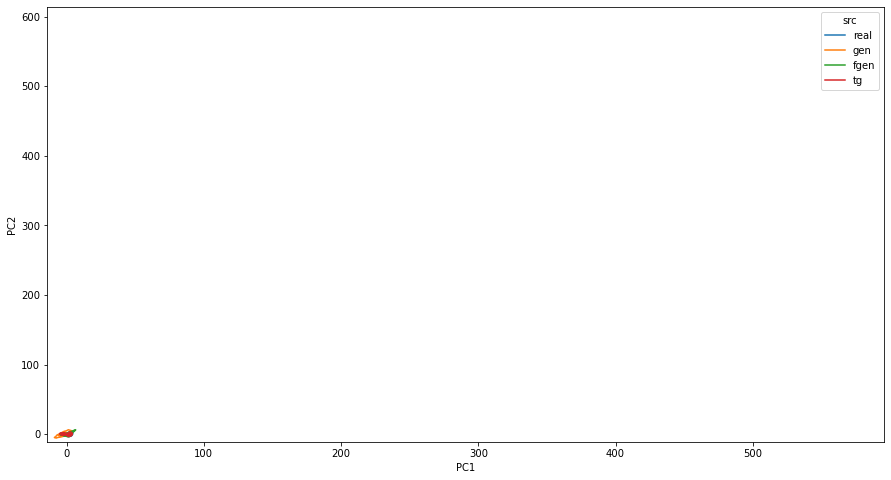

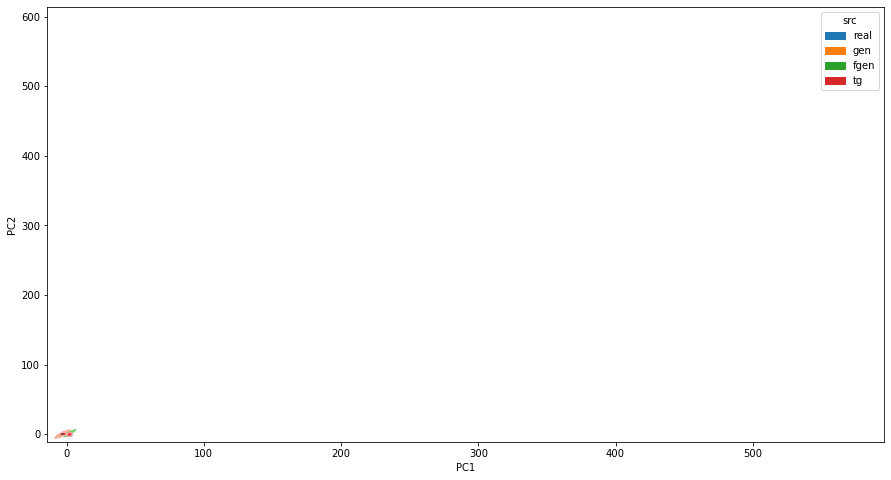

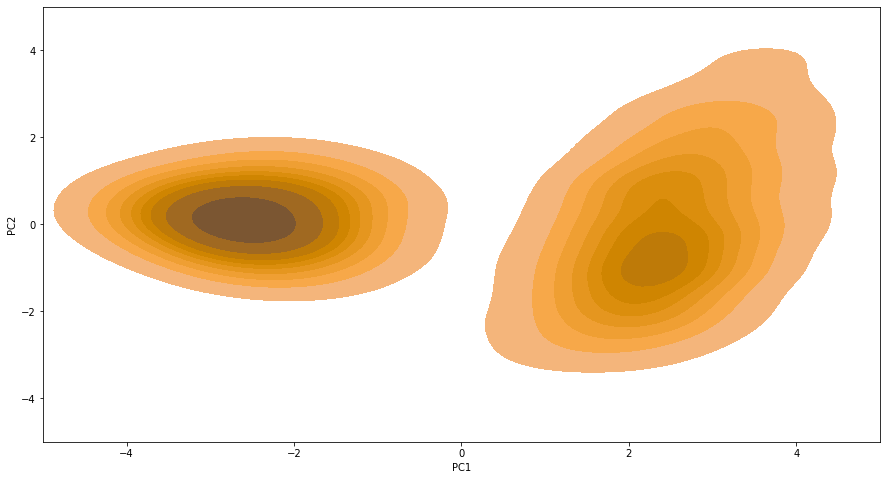

In [35]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src")

plt.figure(figsize=(15, 8))
sns.kdeplot(data=pcs_scaled, x="PC1", y="PC2", hue="src", fill=True)

plt.figure(figsize=(15, 8))
plt.ylim([-5,5])
plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2", fill=True, color="orange")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2", fill=True, color="b")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2", fill=True, color="g")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2", fill=True, color="y")


fig, ax = plt.subplots(1,2, figsize=(18, 7))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0])
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[1])
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1])



plt.show()

# fig, ax = plt.subplots(1,2, figsize=(18, 7))
# ax[0].set_ylim([-5,5])
# ax[0].set_xlim([-5,5])
# ax[1].set_ylim([-5,5])
# ax[1].set_xlim([-5,5])
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0], fill=True)
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[1], fill=True)

# plt.show()

ValueError: Contour levels must be increasing

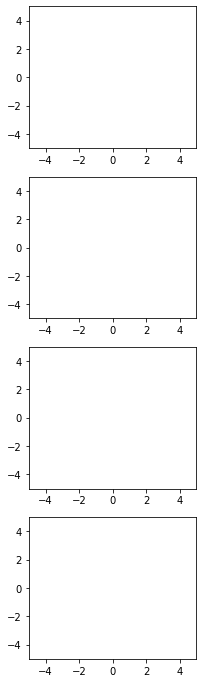

In [36]:
fig, ax = plt.subplots(4,1, figsize=(3,12))
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
ax[2].set_ylim([-5,5])
ax[2].set_xlim([-5,5])
ax[3].set_ylim([-5,5])
ax[3].set_xlim([-5,5])

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
ax[0].set_title("Banksformer Generated")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
ax[1].set_title("Real Data")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
ax[2].set_title("DG Generated")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
ax[3].set_title("TG Generated")
plt.tight_layout()

### Figure

ValueError: Contour levels must be increasing

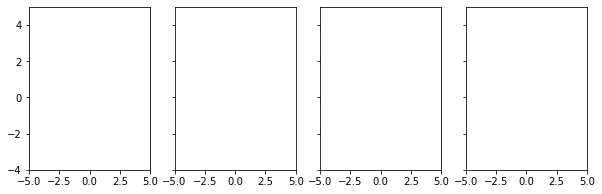

In [37]:
fig, ax = plt.subplots(1,4, figsize=(10,3), sharex=True, sharey=True)
ax[0].set_ylim([-4,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-4,5])
ax[1].set_xlim([-5,5])
ax[2].set_ylim([-4,5])
ax[2].set_xlim([-5,5])
ax[3].set_ylim([-4,5])
ax[3].set_xlim([-5,5])

# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
# ax[0].set_title("Banksformer Generated")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
# ax[1].set_title("Real Data")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
# ax[2].set_title("DG Generated")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
# ax[3].set_title("TG Generated")
# plt.tight_layout()



sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
ax[0].set_title("BF")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
ax[1].set_title("Real Data")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
ax[2].set_title("DG")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
ax[3].set_title("TG")
plt.savefig("figs/seq_pca.png")
plt.tight_layout()

ValueError: Contour levels must be increasing

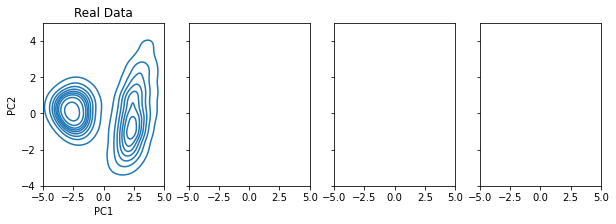

In [38]:
fig, ax = plt.subplots(1,4, figsize=(10,3), sharex=True, sharey=True)
ax[0].set_ylim([-4,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-4,5])
ax[1].set_xlim([-5,5])
ax[2].set_ylim([-4,5])
ax[2].set_xlim([-5,5])
ax[3].set_ylim([-4,5])
ax[3].set_xlim([-5,5])

# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
# ax[0].set_title("Banksformer Generated")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
# ax[1].set_title("Real Data")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
# ax[2].set_title("DG Generated")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
# ax[3].set_title("TG Generated")
# plt.tight_layout()

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[0])
ax[0].set_title("Real Data")

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[1])
ax[1].set_title("BF")

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
ax[2].set_title("DG")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
ax[3].set_title("TG")
plt.savefig("figs/seq_pca.png")
plt.tight_layout()

ValueError: Contour levels must be increasing

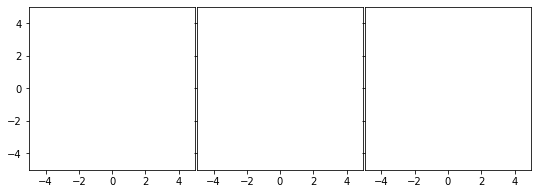

In [39]:
fig, ax = plt.subplots(1,3, figsize=(9,3), sharex=True, sharey=True)
ax[0].set_ylim([-5,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-5,5])
ax[1].set_xlim([-5,5])
ax[2].set_ylim([-5,5])
ax[2].set_xlim([-5,5])
# fig.subplots_adjust(hspace=.1) # height spaces
fig.subplots_adjust(wspace=0.01) # width spaces

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
ax[0].set_title("Banksformer Generated")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
ax[1].set_title("Real Data")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
ax[2].set_title("DG Generated")
plt.show()
# plt.tight_layout()

# Cash flow

In [40]:
for df in [gen_df, tg_df, fgen_df]:

    df["month"] = df["datetime"].dt.month
    df["day"]   = df["datetime"].dt.day
    df["dow"]  =  df["datetime"].dt.dayofweek
    df["year"]  = df["datetime"].dt.year

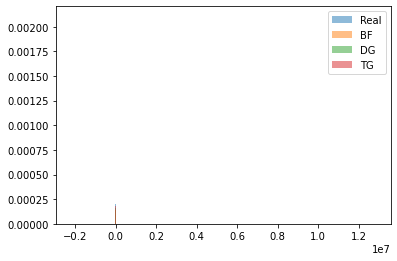

,real,gen,dg,tg,diff_bf,diff_dg,diff_tg
count,9997.000000,6.846000e+03,8506.000000,9991.000000,3.151000e+03,1491.000000,6.000000
mean,727.867271,1.625161e+04,895.312762,-311.126905,-1.552374e+04,-167.445490,1038.994176
std,1386.180033,2.257614e+05,3142.192142,1521.995242,-2.243752e+05,-1756.012109,-135.815209
min,-3091.590000,-2.199854e+06,-4227.280000,-27572.302960,2.196763e+06,1135.690000,24480.712960
25%,-416.380000,-1.634803e+03,-652.552500,-945.224083,1.218423e+03,236.172500,528.844083
50%,1114.650000,-3.231450e+02,-151.115000,-327.949880,1.437795e+03,1265.765000,1442.599880
75%,1705.160000,2.878710e+03,320.737500,281.011751,-1.173550e+03,1384.422500,1424.148249
max,6665.060000,1.281029e+07,16050.380000,7222.372996,-1.280363e+07,-9385.320000,-557.312996


In [41]:
### monthly cash flow by account

# gb = real_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"], as_index=False)["raw_amount"].sum()

# plt.hist(gb.raw_amount, bins="auto")
# plt.show()

# gb = gen_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

# plt.hist(gb.raw_amount, bins="auto")
# plt.show()

# plt.figure(figsize=(12,4))




gbr = real_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbg = gen_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbfg = fgen_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbtg = tg_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

plt.hist(gbr.raw_amount, bins="auto", label="Real", density=True, alpha=0.5)
plt.hist(gbg.raw_amount, bins="auto", label="BF", density=True, alpha=0.5)
plt.hist(gbfg.raw_amount, bins="auto", label="DG", density=True, alpha=0.5)
plt.hist(gbtg.raw_amount, bins="auto", label="TG", density=True, alpha=0.5)


plt.legend()
plt.show()

df = pd.DataFrame.from_dict({"real": gbr.raw_amount.describe(),
                             "gen": gbg.raw_amount.describe(),
                             "dg": gbfg.raw_amount.describe(),
                             "tg": gbtg.raw_amount.describe(),
                            
                            })
df["diff_bf"] = df.real - df.gen
df["diff_dg"] = df.real - df.dg
df["diff_tg"] = df.real - df.tg
df

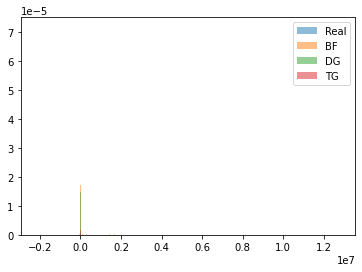

In [42]:
plt.hist(gbr.raw_amount, bins="auto", label="Real", density=True, alpha=0.5)
plt.hist(gbg.raw_amount, bins="auto", label="BF", density=True, alpha=0.5)
plt.hist(gbfg.raw_amount, bins="auto", label="DG", density=True, alpha=0.5)
plt.hist(gbtg.raw_amount, bins="auto", label="TG", density=True, alpha=0.5)

plt.ylim([0.0, 0.000075])

plt.legend()
plt.show()

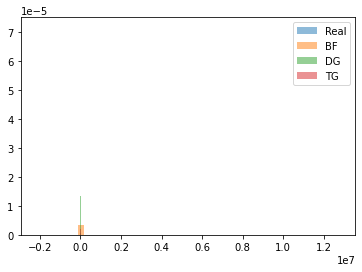

In [43]:
plt.hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
plt.hist(gbg.raw_amount, bins=50, label="BF", density=True, alpha=0.5)
plt.hist(gbfg.raw_amount, bins=50, label="DG", density=True, alpha=0.5)
plt.hist(gbtg.raw_amount, bins=50, label="TG", density=True, alpha=0.5)

plt.ylim([0.0, 0.000075])

plt.legend()
plt.show()

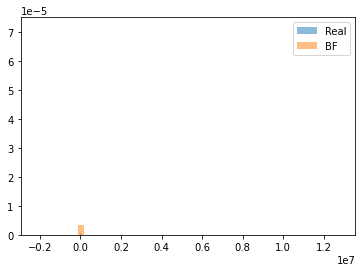

In [44]:


plt.hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
plt.hist(gbg.raw_amount, bins=50, label="BF", density=True, alpha=0.5)
# plt.hist(gbfg.raw_amount, bins=50, label="DG", density=True, alpha=0.5)
# plt.hist(gbtg.raw_amount, bins=50, label="TG", density=True, alpha=0.5)

plt.ylim([0.0, 0.000075])

plt.legend()
plt.show()

In [45]:
from scipy.stats import wasserstein_distance

##### fig

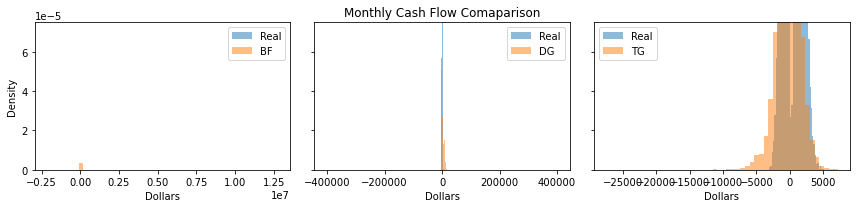

In [46]:
fig, ax = plt.subplots(1,3, figsize=(12,3), 
                       # sharex=True, 
                       sharey=True)

# ax[0].set_ylim([-5,5])
# ax[0].set_xlim([-5,5])
# ax[1].set_ylim([-5,5])
# ax[1].set_xlim([-5,5])
# ax[2].set_ylim([-5,5])
# ax[2].set_xlim([-5,5])
# ax[3].set_ylim([-5,5])
# ax[3].set_xlim([-5,5])

for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[i].hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
    ax[i].hist(vals.raw_amount, bins=50, label=lbl, density=True, alpha=0.5)
    ax[i].set_ylim([0.0, 0.000075])
    
    if i==1:
        ax[i].set_xlim([-10e5/2.25, 10e5/2.25])
        
    ax[i].legend()
    
    wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    # print("Wasserstein between real and", lbl, "is", wd)
    
ax[1].set_title("Monthly Cash Flow Comaparison")

ax[0].set_ylabel("Density")

ax[0].set_xlabel("Dollars")
ax[1].set_xlabel("Dollars")
ax[2].set_xlabel("Dollars")
    
# plt.legend()
plt.tight_layout()
plt.savefig("figs/cash_flow_cz.png")
plt.show()

Wasserstein between real and BF is 22281.996659261727
Wasserstein between real and DG is 1460.7071648290867
Wasserstein between real and TG is 1051.152169134766


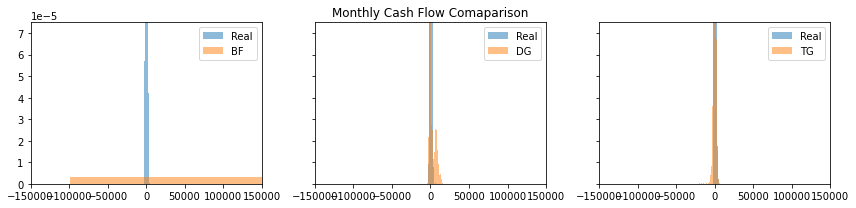

In [47]:
fig, ax = plt.subplots(1,3, figsize=(12,3), 
                       # sharex=True, 
                       sharey=True)

# ax[0].set_ylim([-5,5])
# ax[0].set_xlim([-5,5])
# ax[1].set_ylim([-5,5])
# ax[1].set_xlim([-5,5])
# ax[2].set_ylim([-5,5])
# ax[2].set_xlim([-5,5])
# ax[3].set_ylim([-5,5])
# ax[3].set_xlim([-5,5])

for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[i].hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
    ax[i].hist(vals.raw_amount, bins=50, label=lbl, density=True, alpha=0.5)
    ax[i].set_ylim([0.0, 0.000075])
    ax[i].set_xlim([-10e4*1.5, 10e4*1.5])
    ax[i].legend()
    
    wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    print("Wasserstein between real and", lbl, "is", wd)
    
ax[1].set_title("Monthly Cash Flow Comaparison")
    
# plt.legend()
plt.tight_layout()
plt.show()

# New - joint dom, tcode

In [48]:
real_df.columns

Index(['unnamed: 0', 'index', 'account_id', 'amount', 'balance', 'date',
       'description', 'flag', 'id', 'type', 'age', 'datetime', 'month', 'day',
       'dow', 'year', 'dtme', 'tcode', 'td', 'raw_amount', 'days_passed',
       'Amount'],
      dtype='object')

In [49]:
fgen_df.columns

Index(['tcode_num', 'td', 'amount', 'age', 'account_id', 'datetime', 'tcode',
       'description', 'flag', 'type', 'raw_amount', 'days_passed', 'month',
       'day', 'dow', 'year'],
      dtype='object')

In [50]:
# Creates dataframe with ngram counts.
def create_ngramcount_df(df, n, field):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)[field]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    
            
    return df.reset_index().rename(columns={"index": "ngram"})



In [51]:
for df in [gen_df, fgen_df, tg_df]:
    break
    
    

In [52]:
def set_tcode_day(df):
    df['tcode_day'] = df.tcode + "---" + df.day.astype(str)
    


# End new

In [53]:
os.listdir("generated_data/")

['tg_1-hd_24-nl_4-bs_64--len_20.csv',
 'gen_v2b-v__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'gen_v2b-v__nld_4-dm_128-nh_2-i_0-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 '.DS_Store',
 'sqrt-log_var__gen_v2b__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64-len_25-v2.csv',
 'tg_2-hd_24-nl_4-bs_64--len_20.csv',
 'dg_data_new.csv',
 'updated_dfs.txt',
 'sqrt-log_var__gen_v2b__nld_4-dm_128-nh_2-i_0-dr_0__1-opt_adam-lwi_0-bs_64-len_25-v2.csv',
 'gen_v2b-v__nld_4-dm_128-nh_2-i_2-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'gen_v2b__nld_4-dm_128-nh_2-i_2-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'gen_v2b-nc__nld_4-dm_128-nh_2-i_2-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'gen_v2b-nd__nld_4-dm_128-nh_2-i_1-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 'gen_v2b-nd__nld_4-dm_128-nh_2-i_0-dr_0__1-opt_adam-lwi_0-bs_64--vf1-len_20-v2.csv',
 '.ipynb_checkpoints',
 'gen_v2b__nld_4-dm_128-nh_2-i_0-dr_0__1-opt_adam-lwi_0-bs_64--vf1-

In [54]:
2738
2738
5780

5780

In [55]:
10e6*0.25

2500000.0

# Univariate

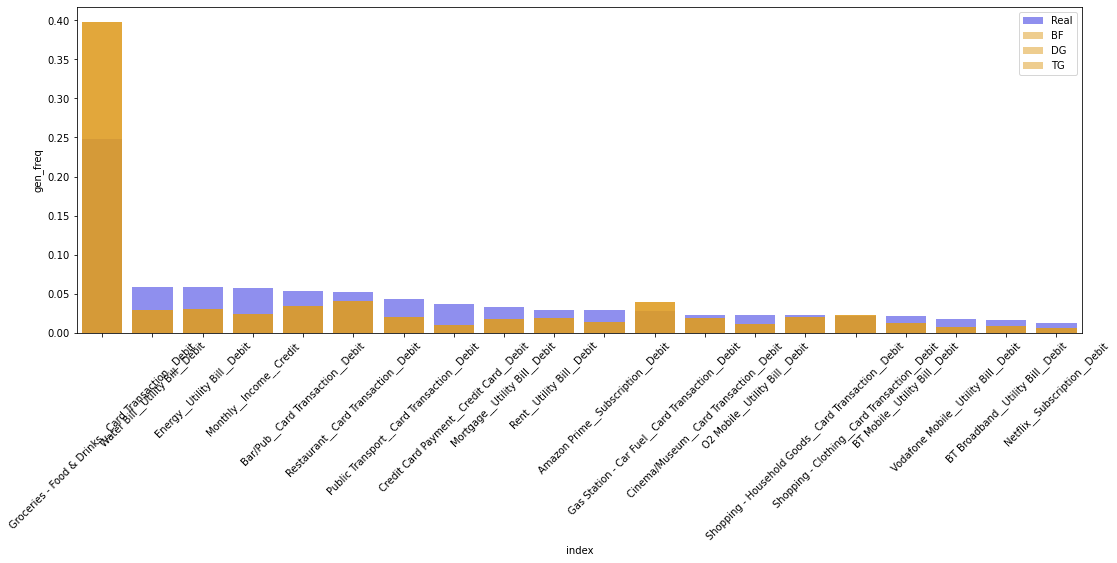

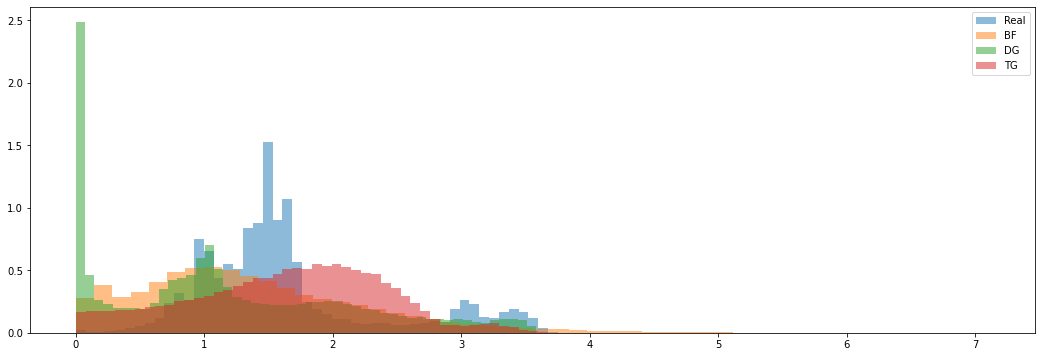

In [56]:
nshow = 20
real_vcs = real_df["tcode"].value_counts()


gen_vcs = gen_df["tcode"].value_counts()

fgen_vcs = fgen_df["tcode"].value_counts()

tg_vcs = tg_df["tcode"].value_counts()

tcode_counts = pd.merge(real_vcs.reset_index(), 
                        gen_vcs.reset_index(), on='index', how="outer", suffixes=("_real", "_gen")).fillna(0)

tcode_counts = pd.merge(tcode_counts.reset_index(), 
                        fgen_vcs.reset_index(), on='index', how="outer", suffixes=("", "_fgen")).fillna(0)
tcode_counts.rename(columns={"tcode":"tcode_fgen"}, inplace=True)

tcode_counts = pd.merge(tcode_counts.drop(columns=['level_0']).reset_index(), 
                        tg_vcs.reset_index(), on='index', how="outer", suffixes=("", "_tg")).fillna(0)
tcode_counts.rename(columns={"tcode":"tcode_tg"}, inplace=True)




tcode_counts["real_freq"] = tcode_counts["tcode_real"] / sum(tcode_counts["tcode_real"])
tcode_counts["gen_freq"] = tcode_counts["tcode_gen"] / sum(tcode_counts["tcode_gen"])
tcode_counts["fgen_freq"] = tcode_counts["tcode_fgen"] / sum(tcode_counts["tcode_fgen"])
tcode_counts["tg_freq"]   = tcode_counts["tcode_tg"] / sum(tcode_counts["tcode_tg"])


plt.figure(figsize=(18, 6))
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real") 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF")
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="DG")
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="TG")

for item in fig.get_xticklabels():
  item.set_rotation(45)


plt.legend()

plt.show()   


ax, fig = plt.subplots(1,1, figsize=(18, 6))
plt.hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True)
plt.hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
plt.hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
plt.hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
plt.legend()

plt.show()   

print("\n"*3)

In [57]:
!pwd

/Users/kylenickerson/Desktop/verafin_proj_big/ecmlkdd/code_uk_shortseq/metrics-final


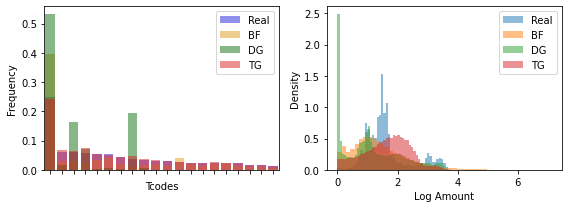

In [58]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
# ax[0].set_ylim([-5,5])
# ax[0].set_xlim([-5,5])
# ax[1].set_ylim([-5,5])
# ax[1].set_xlim([-5,5])
# ax[2].set_ylim([-5,5])
# ax[2].set_xlim([-5,5])

# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
# ax[0].set_title("Banksformer Generated")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
# ax[1].set_title("Real Data")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
# ax[2].set_title("DG Generated")
# plt.tight_layout()


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0])
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="fgen_freq", x="index", color="g", alpha=0.5, label="DG", ax=ax[0])
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="r", alpha=0.5, label="TG", ax=ax[0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")
# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1].hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1].hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1].set_xlabel("Log Amount")
ax[1].set_ylabel("Density")

plt.legend()
plt.tight_layout()
plt.show()  

### Figure

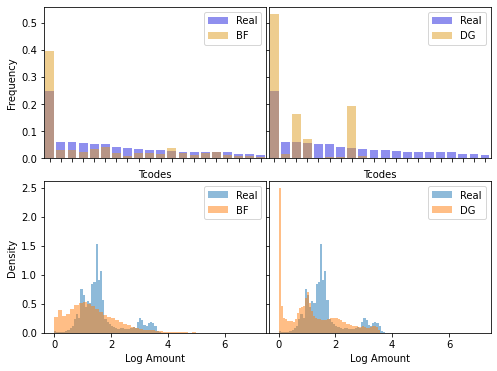

In [59]:
fig, ax = plt.subplots(2,2, figsize=(8,6), sharey="row", sharex="row")
# ax[0].set_ylim([-5,5])
# ax[0].set_xlim([-5,5])
# ax[1].set_ylim([-5,5])
# ax[1].set_xlim([-5,5])
# ax[2].set_ylim([-5,5])
# ax[2].set_xlim([-5,5])

# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
# ax[0].set_title("Banksformer Generated")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
# ax[1].set_title("Real Data")
# sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
# ax[2].set_title("DG Generated")
# plt.tight_layout()
fig.subplots_adjust(hspace=.15) # height spaces
fig.subplots_adjust(wspace=.01) # width spaces

fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="fgen_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")

# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")


ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
# ax[1, 1].set_ylabel("Density")




plt.legend()
# plt.tight_layout()
plt.show()  

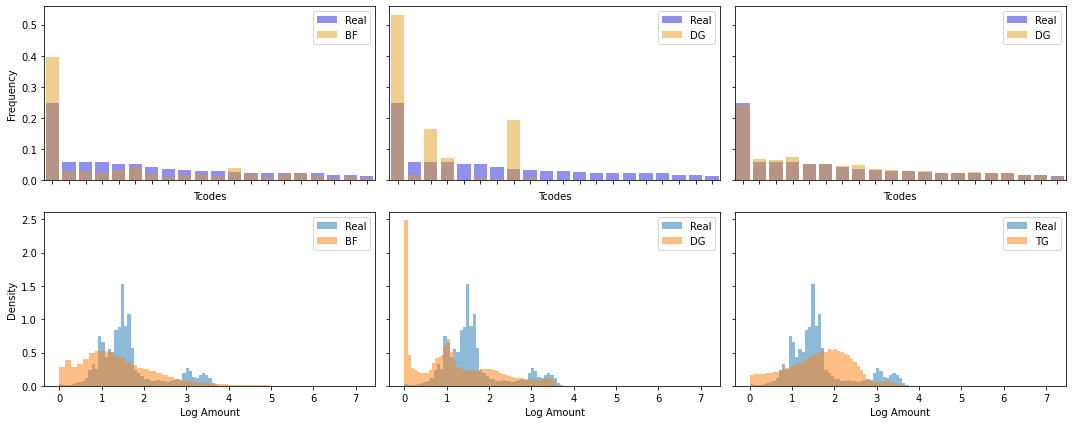

In [60]:
fig, ax = plt.subplots(2,3, figsize=(15,6), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.15) # height spaces
fig.subplots_adjust(wspace=.01) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="fgen_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")




# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 
    
###   Bottom row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")


ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
# ax[1, 1].set_ylabel("Density")
ax[1, 1].legend()

ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()


plt.legend()
plt.tight_layout()
plt.show()  

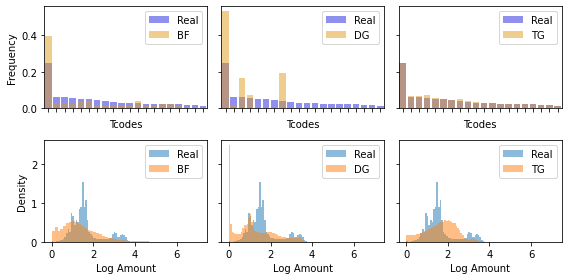

In [61]:
fig, ax = plt.subplots(2,3, figsize=(8,4), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.15) # height spaces
fig.subplots_adjust(wspace=.01) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="fgen_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="TG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")




# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 
    
###   Bottom row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")
ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
ax[1, 1].legend()
# ax[1, 1].set_ylabel("Density")


ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()


plt.tight_layout()
plt.savefig("figs/cz_uv_both.png")
plt.show()  

In [62]:
import matplotlib.ticker as mtick

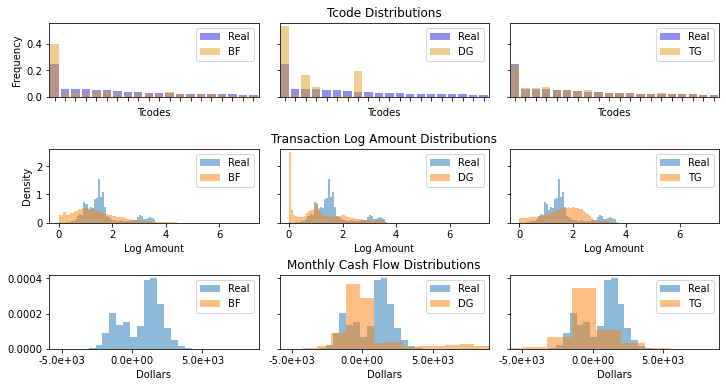

In [63]:
fig, ax = plt.subplots(3,3, figsize=(12,6), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.7) # height spaces
fig.subplots_adjust(wspace=.1) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="fgen_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="TG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


ax[0, 1].set_title("Tcode Distributions")


# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 
    
###   Mid row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")
ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
ax[1, 1].legend()
# ax[1, 1].set_ylabel("Density")


ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()

ax[1, 1].set_title("Transaction Log Amount Distributions")


#### Bottom Row (cash flow)  ####


for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[2, i].hist(gbr.raw_amount, bins=20, label="Real", density=True, alpha=0.5)
    ax[2, i].hist(vals.raw_amount, bins=20, label=lbl, density=True, alpha=0.5)
    # ax[2, i].set_ylim([0.0, 0.000075])
    ax[2, i].set_xlim([-2e3*2.95, 2e3*4.5])
    ax[2, i].set_xlabel("Dollars")
    ax[2, i].legend()
    
    # wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    # print("Wasserstein between real and", lbl, "is", wd)
    
ax[2, 1].set_title("Monthly Cash Flow Distributions")


ax[2, 1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax[2, 1].xaxis.set_major_locator(plt.MaxNLocator(3))

# plt.tight_layout()
plt.savefig("figs/cz_uv_both.png")
plt.show()  

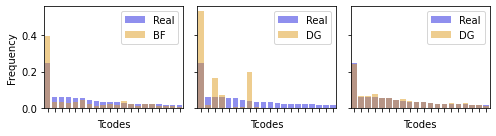

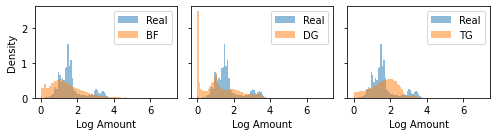

In [64]:
fig, ax = plt.subplots(1,3, figsize=(7,2), sharey="row", sharex="row", squeeze=False)



fig.subplots_adjust(hspace=.15) # height spaces
fig.subplots_adjust(wspace=.01) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="gen_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="fgen_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")

plt.tight_layout()
plt.savefig("figs/cz_uv_tcodes.png")
plt.show()

# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 
fig, ax = plt.subplots(1,3, figsize=(7,2), sharey="row", sharex="row", squeeze=False)

###   Bottom row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[0, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[0, 0].hist(np.log10(gen_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[0, 0].set_xlabel("Log Amount")
ax[0, 0].set_ylabel("Density")
ax[0, 0].legend()

ax[0, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[0, 1].hist(np.log10(fgen_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[0, 1].set_xlabel("Log Amount")
ax[0, 1].legend()
# a0[1, 1].set_ylabel("Density")


ax[0, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[0, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[0, 2].set_xlabel("Log Amount")
ax[0, 2].legend()


plt.tight_layout()
plt.savefig("figs/cz_uv_logamt.png")
plt.show()  

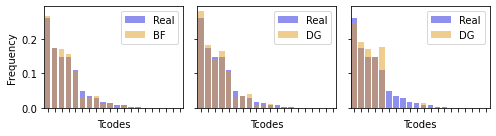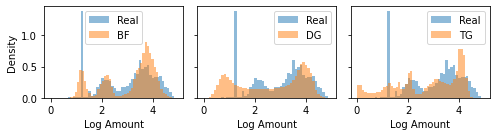

# Joint

### Figure

In [65]:
tcode_counts

,level_0,index,tcode_real,tcode_gen,tcode_fgen,tcode_tg,real_freq,gen_freq,fgen_freq,tg_freq
0,0,Groceries - Food & Drinks__Card Transaction__D...,24779.0,49646,53210.0,23151.0,0.24779,0.397168,0.53210,0.243111
1,1,Water Bill__Utility Bill__Debit,5933.0,3652,1749.0,6369.0,0.05933,0.029216,0.01749,0.066882
2,2,Energy__Utility Bill__Debit,5917.0,3829,16448.0,6187.0,0.05917,0.030632,0.16448,0.064970
3,3,Monthly__Income__Credit,5717.0,3039,7020.0,7090.0,0.05717,0.024312,0.07020,0.074453
4,4,Bar/Pub__Card Transaction__Debit,5316.0,4264,116.0,5081.0,0.05316,0.034112,0.00116,0.053356
...,...,...,...,...,...,...,...,...,...,...
325,325,Restaurant__Utility Bill__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000
326,326,O2 Mobile__Subscription__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000
327,327,Public Transport__Card Transaction__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000
328,328,Netflix__Subscription__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000


In [66]:
tcode_counts

,level_0,index,tcode_real,tcode_gen,tcode_fgen,tcode_tg,real_freq,gen_freq,fgen_freq,tg_freq
0,0,Groceries - Food & Drinks__Card Transaction__D...,24779.0,49646,53210.0,23151.0,0.24779,0.397168,0.53210,0.243111
1,1,Water Bill__Utility Bill__Debit,5933.0,3652,1749.0,6369.0,0.05933,0.029216,0.01749,0.066882
2,2,Energy__Utility Bill__Debit,5917.0,3829,16448.0,6187.0,0.05917,0.030632,0.16448,0.064970
3,3,Monthly__Income__Credit,5717.0,3039,7020.0,7090.0,0.05717,0.024312,0.07020,0.074453
4,4,Bar/Pub__Card Transaction__Debit,5316.0,4264,116.0,5081.0,0.05316,0.034112,0.00116,0.053356
...,...,...,...,...,...,...,...,...,...,...
325,325,Restaurant__Utility Bill__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000
326,326,O2 Mobile__Subscription__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000
327,327,Public Transport__Card Transaction__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000
328,328,Netflix__Subscription__Credit,0.0,1,0.0,0.0,0.00000,0.000008,0.00000,0.000000


###### new fig

In [67]:
real_df[real_df['tcode']==tcode].amount.describe()

NameError: name 'tcode' is not defined

NameError: name 'tcode' is not defined

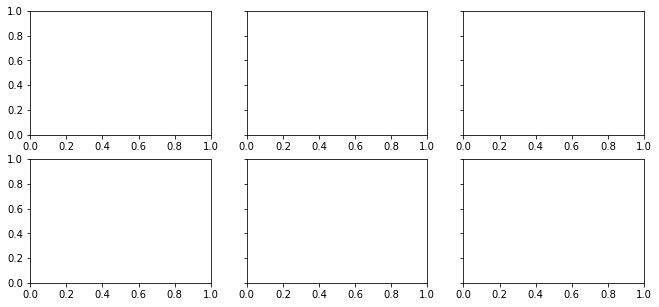

In [68]:
fig, ax = plt.subplots(2,3 , figsize=(11,5), sharey='row', sharex="row")

    # "Day of the Month frequencies for the tcode representing interest credited to the customer",
# interest credited to the customer
titles = [
    "Conditional Log-Amount Distribution for the tcode representing a purchase of Groceries",
    # "Conditional Log-Amount Distribution for the tcode representing an interest payment"
    "Conditional Log-Amount Distribution for the tcode representing payment of a Water bill"
]

len(real_df[real_df['tcode']==tcode].amount.unique())

for i, (ii, tcode, count_r, count_g, count_f, count_t, real_freq, gen_freq, fgen_freq, tg_freq) in tcode_counts.iterrows():
    print(tcode, i)
    plt.figure(figsize=(18,6))
    
    
    percent_of_data = len(real_df[real_df["tcode"]==tcode])/len(real_df)*100
    
    
    title = f"{titles[i]} ({percent_of_data:.2f}% of real data)"
    # title = f"Amount distribution of real transaction with tcode = {tcode} ({percent_of_data:.2f}% of real data)"
    # print(title)
    

    vals_r = np.log10(real_df[real_df["tcode"]==tcode]["amount"]+1)
    vals_g = np.log10(gen_df[gen_df["tcode"]==tcode]["amount"]+1)
    vals_f = np.log10(fgen_df[fgen_df["tcode"]==tcode]["amount"]+1)
    vals_t = np.log10(tg_df[tg_df["tcode"]==tcode]["amount"]+1)
    
    # tcode= tcode.split("--")[0]
    if i == 0:
        ax[i, 0].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
    else:
        ax[i, 0].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
    ax[i, 0].hist(vals_g, bins='auto', label="BF", alpha=0.5, density=True)
    ax[i, 0].legend()
    
    
#     ai, x i].set_title(tcode)
#     ai, x i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')

    
    
    if i == 0:
        ax[i, 1].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
    else:
        ax[i, 1].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
    ax[i, 1].hist(vals_f, bins='auto', label="DG", alpha=0.5, density=True)
    ax[i, 1].legend()
    
    
    if i == 0:
        ax[i, 2].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
    else:
        ax[i, 2].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
    ax[i, 2].hist(vals_t, bins='auto', label="TG", alpha=0.5, density=True)
    ax[i, 2].legend()
    
#     ax[1, i].set_title(tcode)
    
#     ax[1, i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')



    ax[i,1].set_title(title)


    

    if i > 0: break
    # if i > 1: break
      



ax[1, 0].set_xlabel("Log Amount")
ax[1, 1].set_xlabel("Log Amount")
ax[1, 2].set_xlabel("Log Amount")

ax[0, 0].set_ylabel("Density")
ax[1, 0].set_ylabel("Density")


# ax[1,0].set_ylim([0, 20])
# ax[1,0].set_xlim([0.5, 2.5])

# ax[0,1].set_title()

# plt.tight_layout()
fig.tight_layout(h_pad=0.5, w_pad=2)

plt.show()

/Users/kylenickerson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 6.296716688392132] is not finite

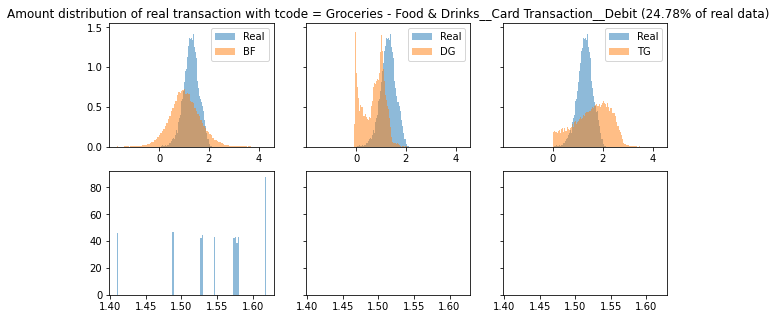

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [69]:
fig, ax = plt.subplots(2,3 , figsize=(10,5), sharey='row', sharex="row")


for i, (ii, tcode, count_r, count_g, count_f, count_t, real_freq, gen_freq, fgen_freq, tg_freq) in tcode_counts.iterrows():
    # print(tcode, i)
    plt.figure(figsize=(18,6))
    
    
    percent_of_data = len(real_df[real_df["tcode"]==tcode])/len(real_df)*100
    
    title = f"Amount distribution of real transaction with tcode = {tcode} ({percent_of_data:.2f}% of real data)"
    # print(title)
    

    vals_r = np.log10(real_df[real_df["tcode"]==tcode]["amount"]+1)
    vals_g = np.log10(gen_df[gen_df["tcode"]==tcode]["amount"]+1)
    vals_f = np.log10(fgen_df[fgen_df["tcode"]==tcode]["amount"]+1)
    vals_t = np.log10(tg_df[tg_df["tcode"]==tcode]["amount"]+1)
    
    # tcode= tcode.split("--")[0]

    ax[i, 0].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 0].hist(vals_g, bins=100, label="BF", alpha=0.5, density=True)
    ax[i, 0].legend()
    
    
#     ai, x i].set_title(tcode)
#     ai, x i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')

    
    ax[i, 1].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 1].hist(vals_f, bins=100, label="DG", alpha=0.5, density=True)
    ax[i, 1].legend()
    
    
    ax[i, 2].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 2].hist(vals_t, bins=100, label="TG", alpha=0.5, density=True)
    ax[i, 2].legend()
    
#     ax[1, i].set_title(tcode)
    
#     ax[1, i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')

    ax[i,1].set_title(title)


    

    if i > 0: break
    # if i > 1: break
      



ax[1, 0].set_xlabel("Log Amount")
ax[1, 1].set_xlabel("Log Amount")
ax[1, 2].set_xlabel("Log Amount")

ax[0, 0].set_ylabel("Density")
ax[1, 0].set_ylabel("Density")

# ax[0,1].set_title()

# plt.tight_layout()

plt.show()

# N-grams  

In [104]:
import nltk
from nltk.util import ngrams

In [105]:
def create_ngramcount_df(df, n):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    df["freqs"] = df["counts"] / sum(df["counts"])

    df.reset_index(inplace=True)
            
    return df

In [106]:
from scipy.spatial import distance

def jensenshannon_diverg(p,q):
    return distance.jensenshannon(p,q, base=2) ** 2

### Set N  

In [108]:
n = 3
real_ngrams = create_ngramcount_df(real_df, n)
gen_ngrams = create_ngramcount_df(gen_df, n)
fgen_ngrams = create_ngramcount_df(fgen_df, n)
tg_ngrams = create_ngramcount_df(tg_df, n)

In [109]:
combo_df = pd.merge(real_ngrams, gen_ngrams, on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df =  pd.merge(combo_df, fgen_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
"counts":"counts_fgen", "freqs":"freqs_fgen"
})

combo_df =  pd.merge(combo_df, tg_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
"counts":"counts_tg", "freqs":"freqs_tg", "index":"ngram"
})
# , "index":"ngram"
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen,counts_fgen,freqs_fgen,counts_tg,freqs_tg
0,'Groceries - Food & Drinks__Card Transaction__...,1641.0,0.018233,813.0,0.009033,42517.0,0.472411,2180.0,0.025578
1,'Groceries - Food & Drinks__Card Transaction__...,948.0,0.010533,345.0,0.003833,361.0,0.004011,899.0,0.010548
2,'Groceries - Food & Drinks__Card Transaction__...,912.0,0.010133,387.0,0.004300,36.0,0.000400,933.0,0.010947
3,'Groceries - Food & Drinks__Card Transaction__...,690.0,0.007667,334.0,0.003711,10.0,0.000111,788.0,0.009245
4,'Groceries - Food & Drinks__Card Transaction__...,632.0,0.007022,489.0,0.005433,0.0,0.000000,634.0,0.007439
...,...,...,...,...,...,...,...,...,...
25659,"'Vodafone Mobile__Utility Bill__Debit', 'Sky B...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012
25660,"'Sky Broadband__Utility Bill__Debit', 'Three M...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012
25661,'Shopping - Clothing__Card Transaction__Debit'...,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012
25662,"'BT Broadband__Utility Bill__Debit', 'Virgin M...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012


In [110]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"])

0.22477857594963657

In [111]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_fgen"])

0.8975559113325285

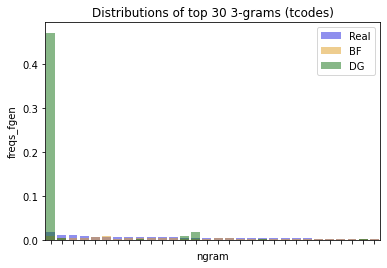

In [112]:

plt.figure(figsize=(6,4))
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real")
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_gen", color="orange", alpha=0.5, label="BF")
barplt = sns.barplot(data = combo_df.iloc[:30],x="ngram", y="freqs_fgen", color="g", alpha=0.5, label="DG")
# for item in barplt.get_xticklabels():
#     item.set_rotation(70)
    
barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
plt.title("Distributions of top 30 3-grams (tcodes)")    
plt.legend()
plt.show()

### Figure

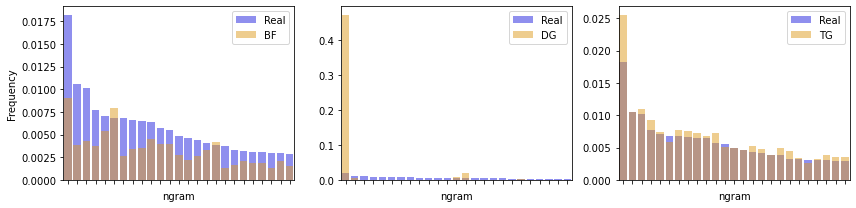

In [118]:

# plt.figure
fig, ax = plt.subplots(1, 3, figsize=(12,3))

barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[0])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("Frequency")


barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[1])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_fgen", color="orange", alpha=0.5, label="DG", ax=ax[1])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("")



barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[2])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_tg", color="orange", alpha=0.5, label="TG", ax=ax[2])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("")



# plt.title("Distributions of top 30 3-grams (tcodes)")    
plt.legend()
plt.tight_layout()
# fig.subplots_adjust(wspace=.05) 
plt.show()

In [121]:
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen,counts_fgen,freqs_fgen,counts_tg,freqs_tg
0,'Groceries - Food & Drinks__Card Transaction__...,1641.0,0.018233,813.0,0.009033,42517.0,0.472411,2180.0,0.025578
1,'Groceries - Food & Drinks__Card Transaction__...,948.0,0.010533,345.0,0.003833,361.0,0.004011,899.0,0.010548
2,'Groceries - Food & Drinks__Card Transaction__...,912.0,0.010133,387.0,0.004300,36.0,0.000400,933.0,0.010947
3,'Groceries - Food & Drinks__Card Transaction__...,690.0,0.007667,334.0,0.003711,10.0,0.000111,788.0,0.009245
4,'Groceries - Food & Drinks__Card Transaction__...,632.0,0.007022,489.0,0.005433,0.0,0.000000,634.0,0.007439
...,...,...,...,...,...,...,...,...,...
25659,"'Vodafone Mobile__Utility Bill__Debit', 'Sky B...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012
25660,"'Sky Broadband__Utility Bill__Debit', 'Three M...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012
25661,'Shopping - Clothing__Card Transaction__Debit'...,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012
25662,"'BT Broadband__Utility Bill__Debit', 'Virgin M...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000012


In [122]:
fgen_df.tcode.value_counts().reset_index()

,index,tcode
0,Groceries - Food & Drinks__Card Transaction__D...,53210
1,Credit Card Payment__Credit Card__Debit,19452
2,Energy__Utility Bill__Debit,16448
3,Monthly__Income__Credit,7020
4,Water Bill__Utility Bill__Debit,1749
5,Mortgage__Utility Bill__Debit,706
6,Restaurant__Card Transaction__Debit,587
7,Public Transport__Card Transaction__Debit,429
8,Virgin Media Broadband__Utility Bill__Debit,274
9,Bar/Pub__Card Transaction__Debit,116


In [127]:
df = fgen_df.tcode.value_counts().reset_index()
df['ps'] = df['tcode']/len(fgen_df)
df

,index,tcode,ps
0,Groceries - Food & Drinks__Card Transaction__D...,53210,0.53210
1,Credit Card Payment__Credit Card__Debit,19452,0.19452
2,Energy__Utility Bill__Debit,16448,0.16448
3,Monthly__Income__Credit,7020,0.07020
4,Water Bill__Utility Bill__Debit,1749,0.01749
5,Mortgage__Utility Bill__Debit,706,0.00706
6,Restaurant__Card Transaction__Debit,587,0.00587
7,Public Transport__Card Transaction__Debit,429,0.00429
8,Virgin Media Broadband__Utility Bill__Debit,274,0.00274
9,Bar/Pub__Card Transaction__Debit,116,0.00116


In [125]:
df = real_df.tcode.value_counts().reset_index()
df['ps'] = df['tcode']/len(real_df)
df

,index,tcode,ps
0,Groceries - Food & Drinks__Card Transaction__D...,24779,0.24779
1,Water Bill__Utility Bill__Debit,5933,0.05933
2,Energy__Utility Bill__Debit,5917,0.05917
3,Monthly__Income__Credit,5717,0.05717
4,Bar/Pub__Card Transaction__Debit,5316,0.05316
5,Restaurant__Card Transaction__Debit,5281,0.05281
6,Public Transport__Card Transaction__Debit,4326,0.04326
7,Credit Card Payment__Credit Card__Debit,3734,0.03734
8,Mortgage__Utility Bill__Debit,3263,0.03263
9,Rent__Utility Bill__Debit,2970,0.02970


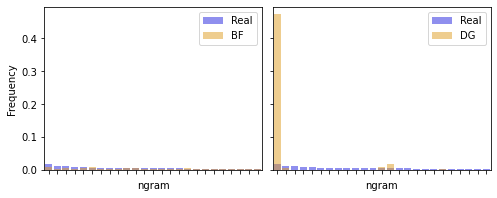

In [114]:

# plt.figure
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True)

barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[0])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("Frequency")


barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[1])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_fgen", color="orange", alpha=0.5, label="DG", ax=ax[1])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.set_ylabel("")

# plt.title("Distributions of top 30 3-grams (tcodes)")    
plt.legend()
# plt.tight_layout()
fig.subplots_adjust(wspace=.05) 
plt.show()

In [115]:
from scipy.special import rel_entr
from scipy.special import entr

def compute_ngrams(real_df, gen_df, n_vals = range(1, 11), pseudo_counts=0.5, verbose=False, field = "tcode"):

    
    n_tcodes = len(real_df[field].unique())
    
    results = {}

    
    for n in n_vals:

        real_ngrams = create_ngramcount_df(real_df, n)
        gen_ngrams = create_ngramcount_df(gen_df, n)



        combo_df = pd.merge(real_ngrams, gen_ngrams, on="ngram", how="outer", suffixes=("_real", "_gen")).fillna(0.0)


        N_obs_real = real_ngrams["counts"].sum()
        N_obs_gen = real_ngrams["counts"].sum()

        N_possible_ngrams = n_tcodes**n 
        
        j_dist = distance.jaccard(combo_df["counts_real"]>0, combo_df["counts_gen"] > 0)

        combo_df["counts_real"] += pseudo_counts
        combo_df["ps_real"] = combo_df["counts_real"] / (N_obs_real + N_possible_ngrams*pseudo_counts)
        combo_df["counts_gen"] += pseudo_counts
        combo_df["ps_gen"] = combo_df["counts_gen"] / (N_obs_gen + N_possible_ngrams*pseudo_counts)

        combo_df["ps_mid"] = (combo_df["ps_real"] + combo_df["ps_gen"])/2



        kl_real_M = sum(rel_entr(combo_df["ps_real"], combo_df["ps_mid"])) 
        kl_gen_M = sum(rel_entr(combo_df["ps_gen"], combo_df["ps_mid"]))
        
        jsd = (kl_real_M + kl_gen_M)/2
        
        
        n_unobs = N_possible_ngrams - len(combo_df)
        
        entr_r = entr(combo_df["ps_real"]).sum()  # from observed
        p_each_unobs = pseudo_counts / (N_obs_real + N_possible_ngrams*pseudo_counts)
        entr_r += -p_each_unobs*np.log(p_each_unobs)*n_unobs   # from unobserved

        entr_g = entr(combo_df["ps_gen"]).sum()  # from observed
        p_each_unobs = pseudo_counts / (N_obs_gen + N_possible_ngrams*pseudo_counts)
        entr_g += -p_each_unobs*np.log(p_each_unobs)*n_unobs   # from unobserved
             

        if verbose:
            print(f"{n}-grams:\t jsd = {jsd:.3f}\t r-{len(real_ngrams)}\t\t\t ({len(real_ngrams)*100/N_possible_ngrams:.5f}%)\
            \t g-{len(gen_ngrams)} \t ({len(gen_ngrams)*100/N_possible_ngrams:.5f}%)")
            
#         results.append((jsd, entr_r, entr_g))
        results[n] = {"jsd":jsd, "entr_r":entr_r, "entr_g":entr_g,
                     "l1":distance.minkowski(combo_df["ps_real"], combo_df["ps_gen"], p=1), 
                      "l2":distance.minkowski(combo_df["ps_real"], combo_df["ps_gen"], p=2),
                     "jac": j_dist}
            
    return results



def create_ngramcount_df(df, n, field = "tcode"):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)[field]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    
            
    return df.reset_index().rename(columns={"index": "ngram"})


### Maybe add table like this?

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, gen_df, n_vals = range(1, 5), pseudo_counts=1, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, fgen_df, n_vals = range(1, 5), pseudo_counts=1, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, gen_df, n_vals = range(1, 5), pseudo_counts=.01, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, fgen_df, n_vals = range(1, 5), pseudo_counts=.01, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, gen_df, n_vals = range(1, 5), pseudo_counts=.1, verbose=True, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, fgen_df, n_vals = range(1, 5), pseudo_counts=.1, verbose=True, field = "tcode"))

In [ ]:
len(tcode_names) 

In [ ]:
len(tcode_names) ** 3

In [ ]:
len(tcode_names) ** 2

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, gen_df, n_vals = range(1, 5), pseudo_counts=1, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, fgen_df, n_vals = range(1, 5), pseudo_counts=1, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, gen_df, n_vals = range(1, 5), pseudo_counts=1e-9, verbose=False, field = "tcode"))

In [ ]:
pd.DataFrame.from_dict(compute_ngrams(real_df, fgen_df, n_vals = range(1, 5), pseudo_counts=1e-9, verbose=False, field = "tcode"))

# Dates

In [128]:
""" PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT 14.75%
    __REMITTANCE TO ANOTHER BANK__DEBIT 5.00% """

use_codes = ['PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT', ' __REMITTANCE TO ANOTHER BANK__DEBIT']

In [130]:
len(f1_opts)

44

In [ ]:
i

In [ ]:
titles

## here

In [ ]:

    
#     # tcode= tcode.split("--")[0]
#     if i == 0:
#         ax[i, 0].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
#     else:
#         ax[i, 0].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
#     ax[i, 0].hist(vals_g, bins='auto', label="BF", alpha=0.5, density=True)
#     ax[i, 0].legend()
    
    
# #     ai, x i].set_title(tcode)
# #     ai, x i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')

    
    
#     if i == 0:
#         ax[i, 1].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
#     else:
#         ax[i, 1].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
#     ax[i, 1].hist(vals_f, bins='auto', label="DG", alpha=0.5, density=True)
#     ax[i, 1].legend()
    
    
#     if i == 0:
#         ax[i, 2].hist(vals_r, bins='auto', label="Real", alpha=0.5, density=True)
#     else:
#         ax[i, 2].hist(vals_r, bins=10, label="Real", alpha=0.5, density=True)
        
#     ax[i, 2].hist(vals_t, bins='auto', label="TG", alpha=0.5, density=True)
#     ax[i, 2].legend()
    
# #     ax[1, i].set_title(tcode)
    
# #     ax[1, i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(gen_df):.3f}% g)')



#     ax[i,1].set_title(title)


    

#     if i > 0: break
#     # if i > 1: break
      



# ax[1, 0].set_xlabel("Log Amount")
# ax[1, 1].set_xlabel("Log Amount")
# ax[1, 2].set_xlabel("Log Amount")

# ax[0, 0].set_ylabel("Density")
# ax[1, 0].set_ylabel("Density")


# # ax[1,0].set_ylim([0, 20])
# # ax[1,0].set_xlim([0.5, 2.5])

# # ax[0,1].set_title()

# # plt.tight_layout()
# fig.tight_layout(h_pad=0.5, w_pad=2)

# plt.show()

Days of real transaction with tcode = Groceries - Food & Drinks__Card Transaction__Debit 24.78% of real data
Days of real transaction with tcode = Water Bill__Utility Bill__Debit 5.93% of real data
Days of real transaction with tcode = Energy__Utility Bill__Debit 5.92% of real data
Days of real transaction with tcode = Monthly__Income__Credit 5.72% of real data


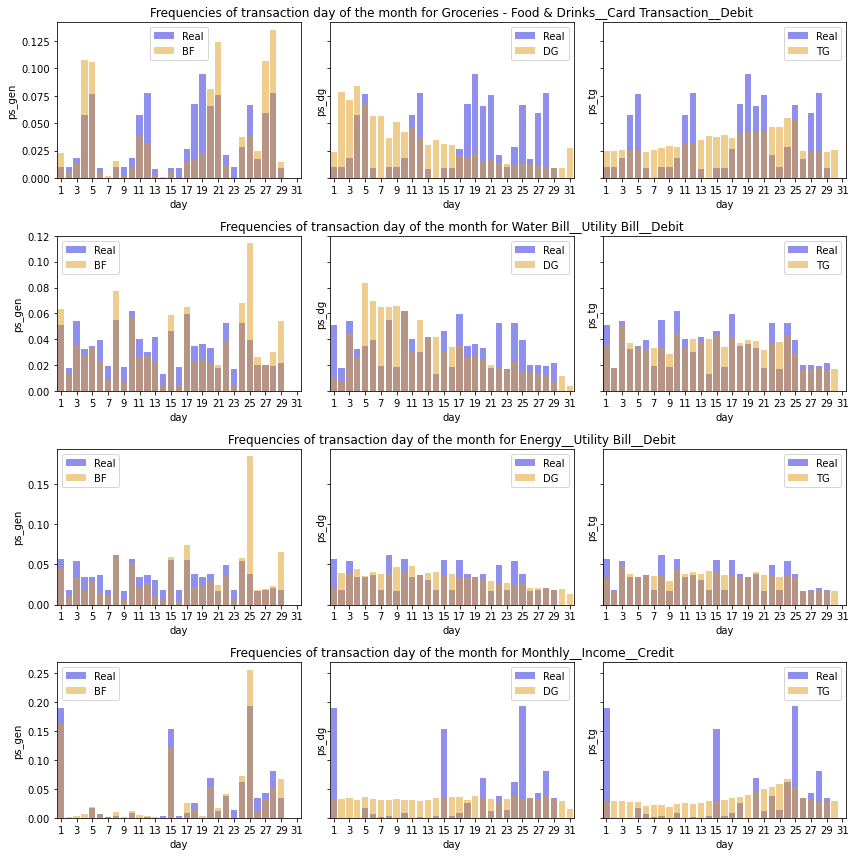

In [160]:
field1 = 'tcode'
field2 = 'day'
plot_sort_by = "counts_real"
plot_n = 32

rows = 4

fig, ax = plt.subplots(rows,3 , figsize=(12, 3 * rows), sharey='row', sharex="row")


f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))



# make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, **barplot_params)



combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    gen_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(fgen_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]





for i, code_1 in enumerate(f1_opts):
    
    if i == rows:
        break
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        gen_df[gen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(fgen_df[fgen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    
    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    # fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[i,0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[i,0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[i,1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[i,2])



    if i < rows - 1:
        for ii in range(3):

            # ax[i, ii].set_xlabel("")
            
            ax[i, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
            ax[i, ii].legend()
        
        
    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)



    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    ax[i, 1].set_title(f"Frequencies of transaction day of the month for {code_1}")    
    
    
    
for ii in range(3):

    ax[-1, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
    ax[-1, ii].legend()


plt.tight_layout()
plt.show()

Dows of real transaction with tcode = Groceries - Food & Drinks__Card Transaction__Debit 24.78% of real data
Dows of real transaction with tcode = Water Bill__Utility Bill__Debit 5.93% of real data


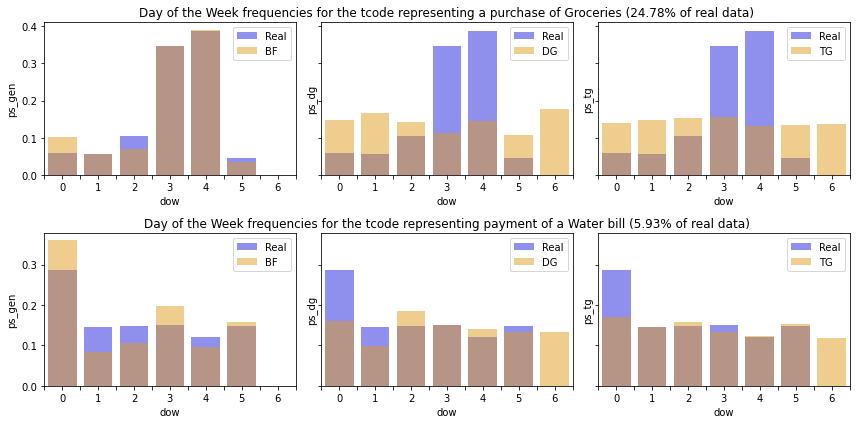

In [166]:
field1 = 'tcode'
field2 = 'dow'
plot_sort_by = "counts_real"
plot_n = 32

rows = 2

fig, ax = plt.subplots(rows,3 , figsize=(12, 3 * rows), sharey='row', sharex="row")


f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))



# make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, **barplot_params)



combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    gen_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(fgen_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]


titles = [
    # "Day of the Month frequencies for the tcode representing an interest payment",
    "Day of the Week frequencies for the tcode representing a purchase of Groceries",
    "Day of the Week frequencies for the tcode representing payment of a Water bill",
]

# titles = [
#     "Conditional Log-Amount Distribution for the tcode representing a purchase of Groceries",
#     # "Conditional Log-Amount Distribution for the tcode representing an interest payment"
#     "Conditional Log-Amount Distribution for the tcode representing payment of a Water bill"
# ]


for i, code_1 in enumerate(f1_opts):
    
    if i == rows:
        break
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        gen_df[gen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(fgen_df[fgen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    


    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    # fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[i,0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[i,0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[i,1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[i,2])



    if i < rows - 1:
        for ii in range(3):

            # ax[i, ii].set_xlabel("")
            
            ax[i, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
            ax[i, ii].legend()
        
        
    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)



    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    
    percent_of_data = len(real_df[real_df[field1]==code_1])/len(real_df)*100
    title = f"{titles[i]} ({percent_of_data:.2f}% of real data)"
    
    ax[i, 1].set_title(title) 
    # ax[i, 1].set_title(f"Frequencies of transaction day of the month for {code_1}")    
    
    
    
for ii in range(3):

    ax[-1, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
    ax[-1, ii].legend()


plt.tight_layout()
plt.show()

## check all

Days of real transaction with tcode = Groceries - Food & Drinks__Card Transaction__Debit 24.78% of real data


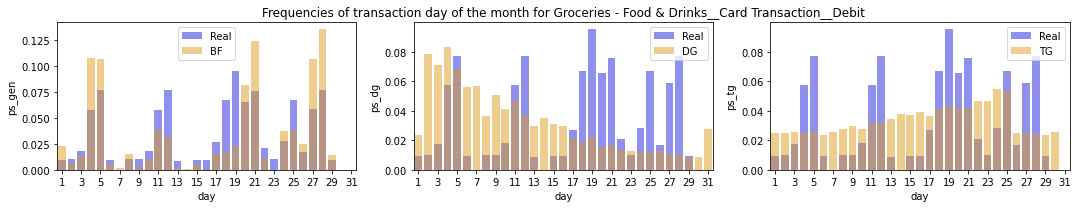

Days of real transaction with tcode = Water Bill__Utility Bill__Debit 5.93% of real data


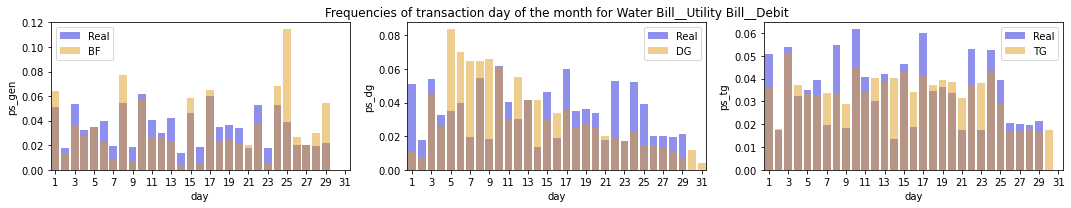

Days of real transaction with tcode = Energy__Utility Bill__Debit 5.92% of real data


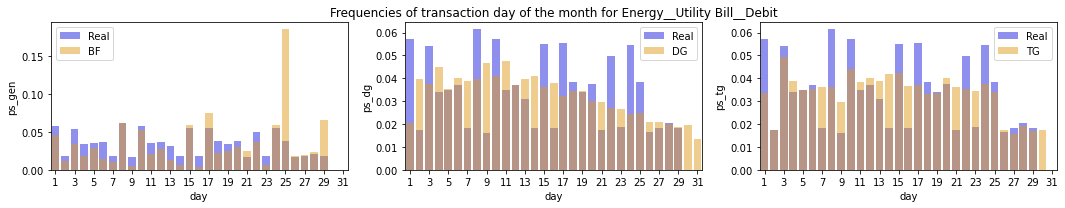

Days of real transaction with tcode = Monthly__Income__Credit 5.72% of real data


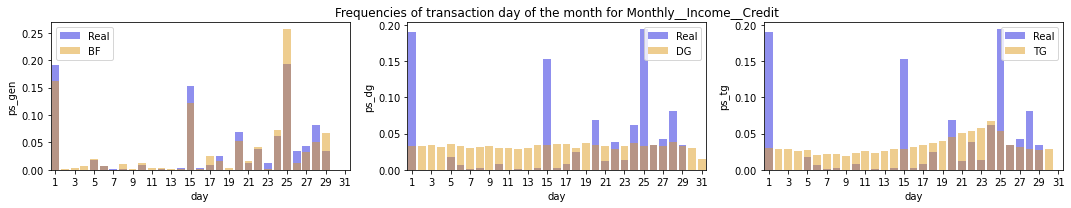

Days of real transaction with tcode = Bar/Pub__Card Transaction__Debit 5.32% of real data


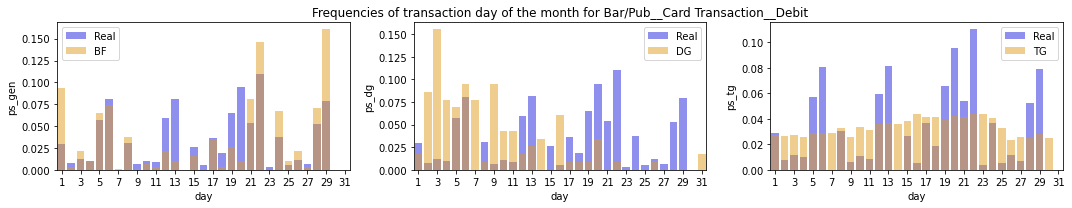

Days of real transaction with tcode = Restaurant__Card Transaction__Debit 5.28% of real data


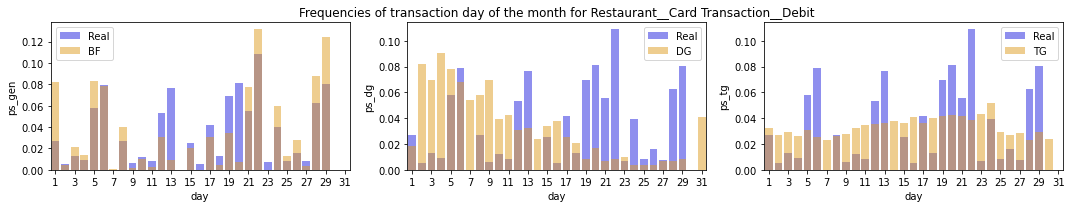

Days of real transaction with tcode = Public Transport__Card Transaction__Debit 4.33% of real data


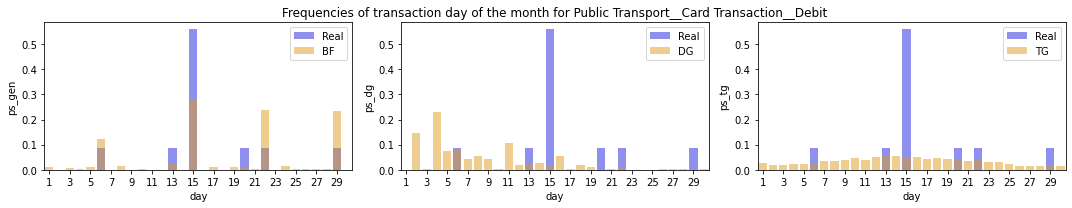

Days of real transaction with tcode = Credit Card Payment__Credit Card__Debit 3.73% of real data


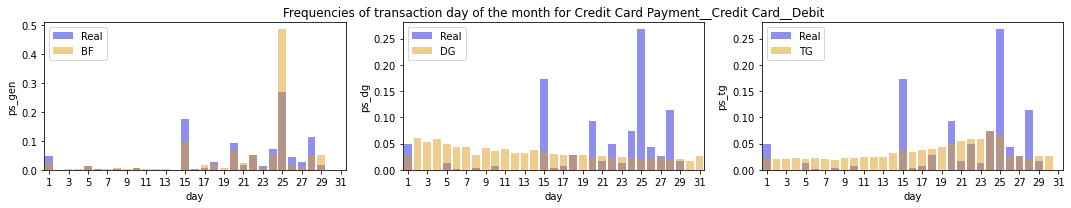

Days of real transaction with tcode = Mortgage__Utility Bill__Debit 3.26% of real data


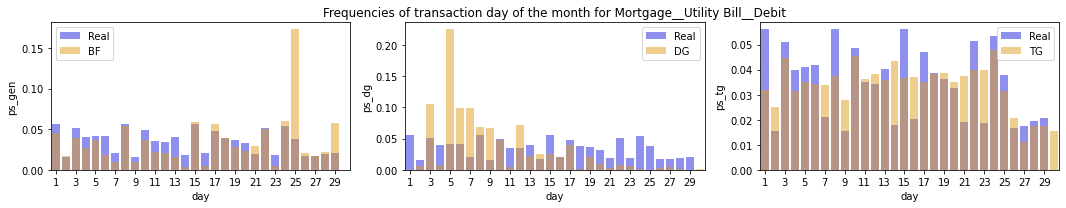

Days of real transaction with tcode = Rent__Utility Bill__Debit 2.97% of real data


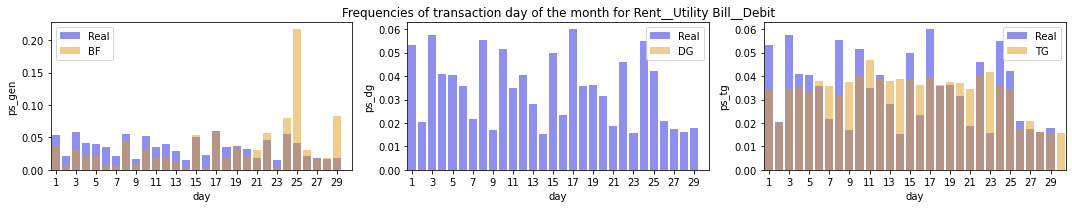

Days of real transaction with tcode = Amazon Prime__Subscription__Debit 2.96% of real data


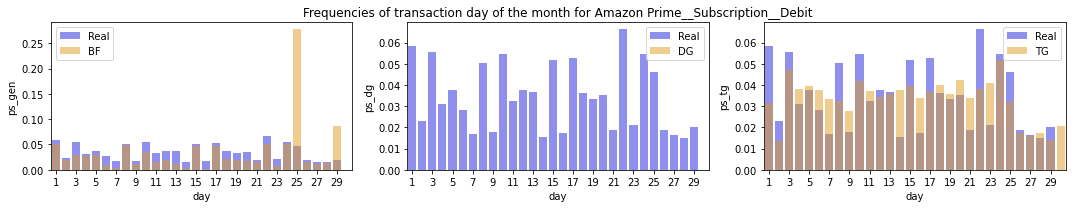

Days of real transaction with tcode = Gas Station - Car Fuel__Card Transaction__Debit 2.77% of real data


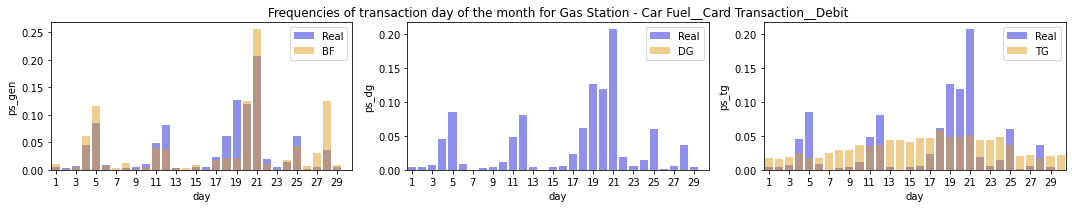

Days of real transaction with tcode = Cinema/Museum__Card Transaction__Debit 2.27% of real data


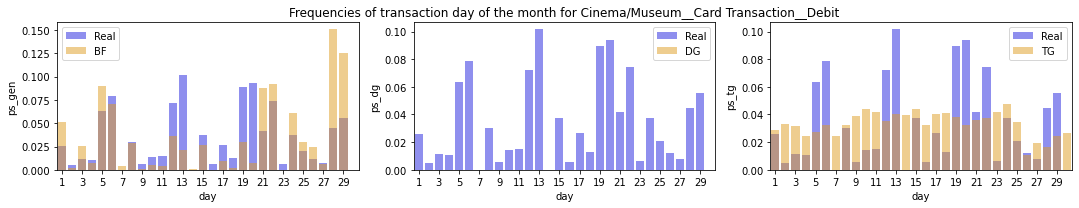

Days of real transaction with tcode = O2 Mobile__Utility Bill__Debit 2.25% of real data


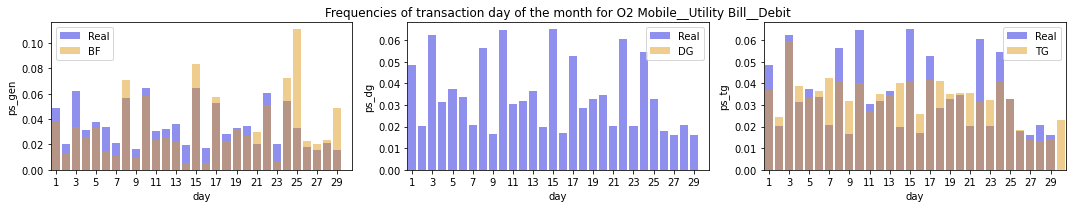

Days of real transaction with tcode = Shopping - Household Goods__Card Transaction__Debit 2.24% of real data


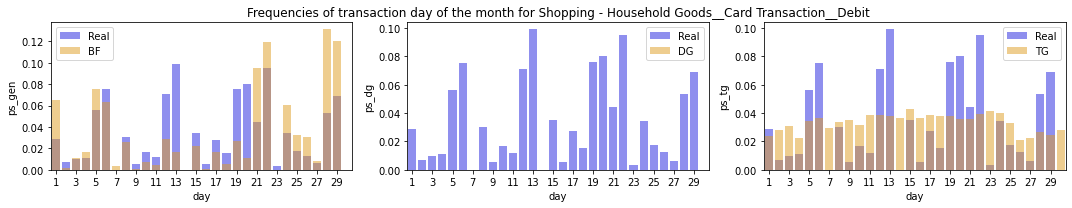

Days of real transaction with tcode = Shopping - Clothing__Card Transaction__Debit 2.23% of real data


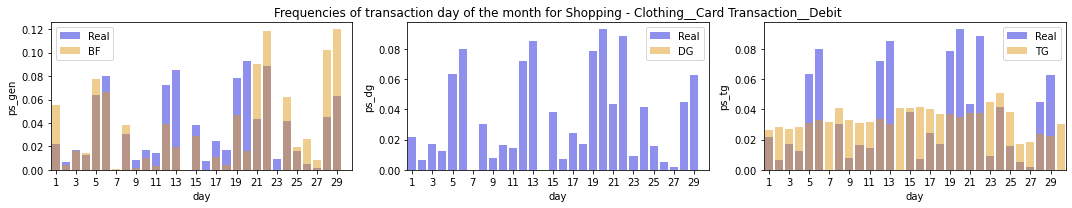

Days of real transaction with tcode = BT Mobile__Utility Bill__Debit 2.19% of real data


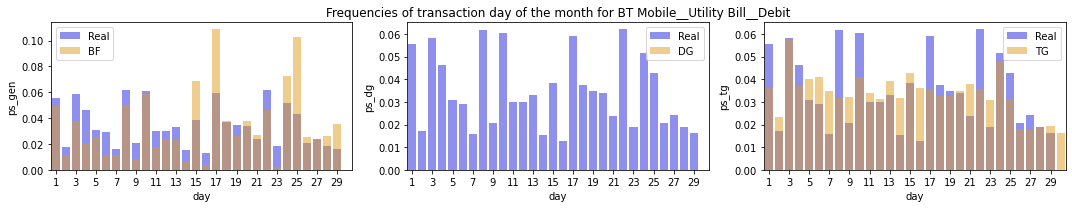

Days of real transaction with tcode = Vodafone Mobile__Utility Bill__Debit 1.74% of real data


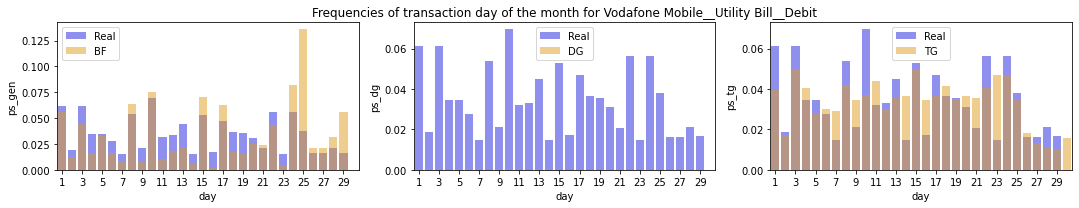

Days of real transaction with tcode = BT Broadband__Utility Bill__Debit 1.65% of real data


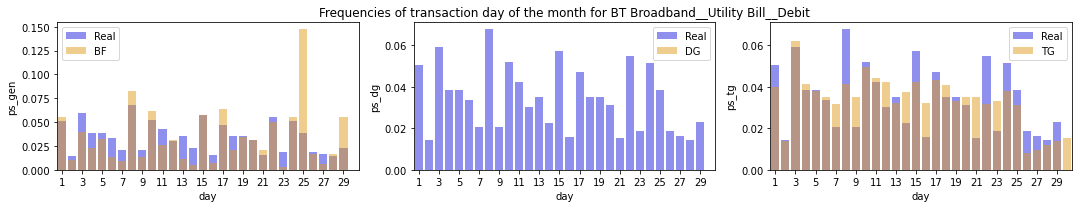

Days of real transaction with tcode = Netflix__Subscription__Debit 1.32% of real data


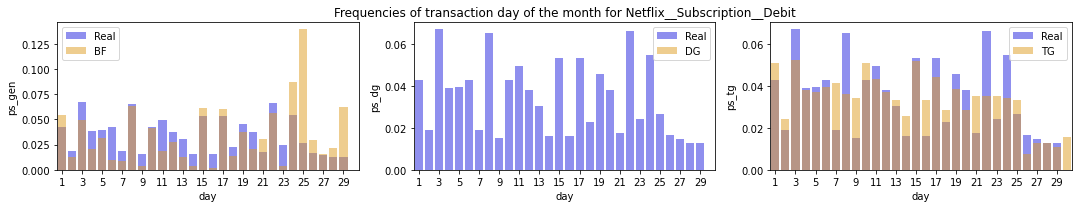

Days of real transaction with tcode = Sky Broadband__Utility Bill__Debit 1.11% of real data


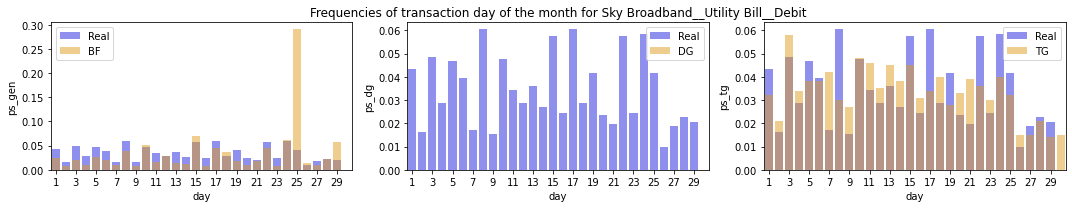

Days of real transaction with tcode = Virgin Media Broadband__Utility Bill__Debit 1.08% of real data


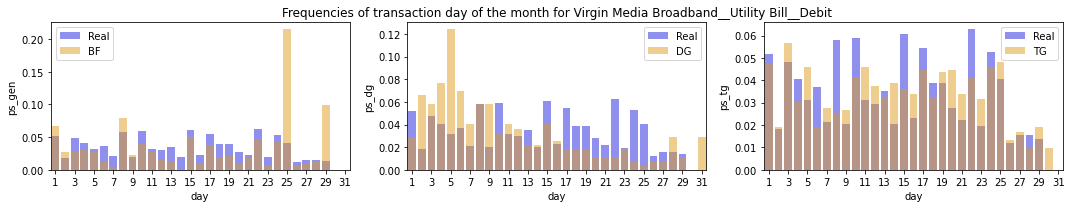

Days of real transaction with tcode = Three Mobile__Utility Bill__Debit 0.99% of real data


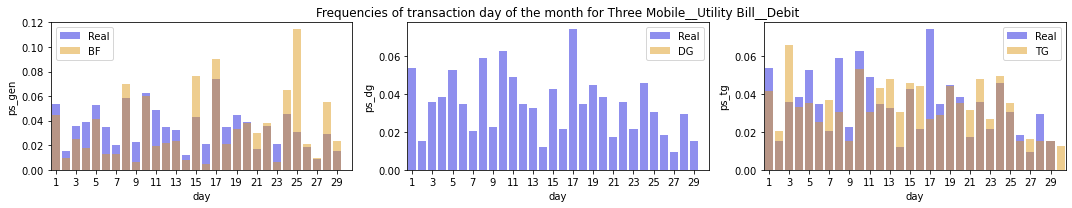

Days of real transaction with tcode = Weekly__Income__Credit 0.93% of real data


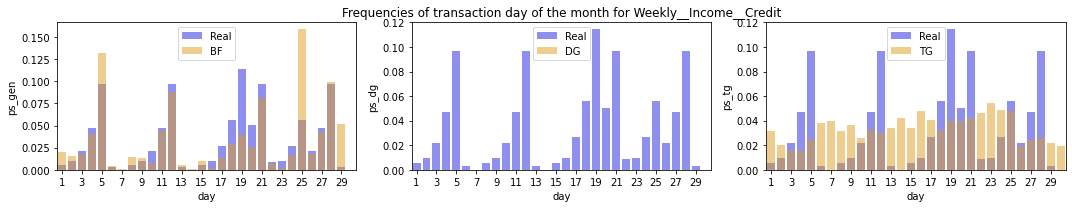

Days of real transaction with tcode = Sky GO__Subscription__Debit 0.87% of real data


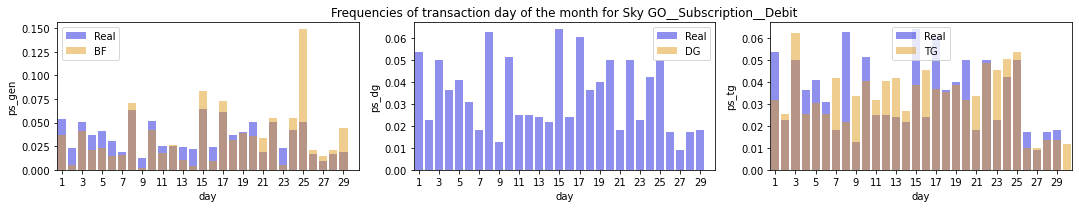

Days of real transaction with tcode = TalkTalk Broadband__Utility Bill__Debit 0.82% of real data


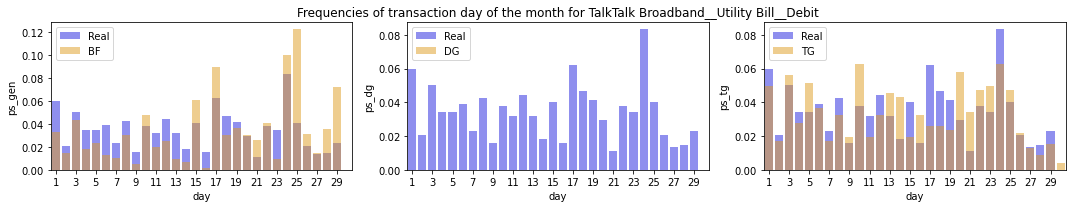

Days of real transaction with tcode = Graze__Subscription__Debit 0.63% of real data


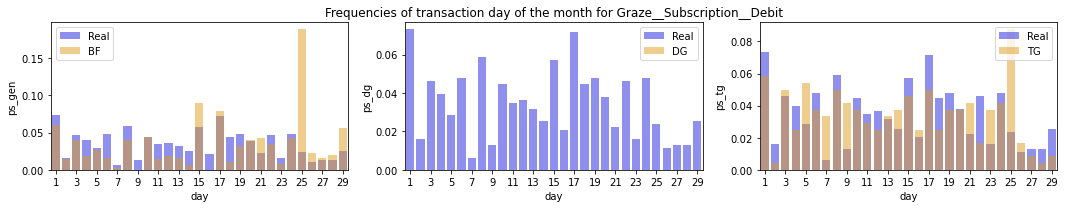

Days of real transaction with tcode = Tesco Mobile Mobile__Utility Bill__Debit 0.63% of real data


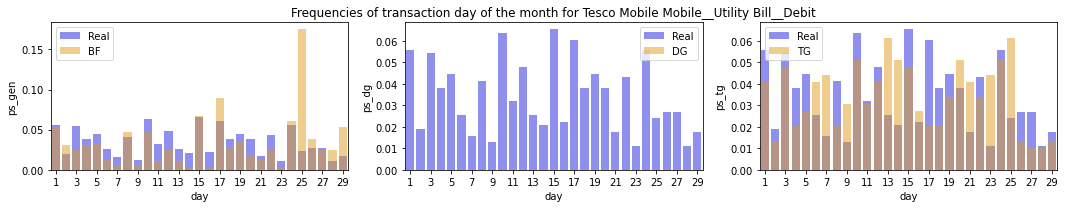

Days of real transaction with tcode = Four-weekly__Income__Credit 0.61% of real data


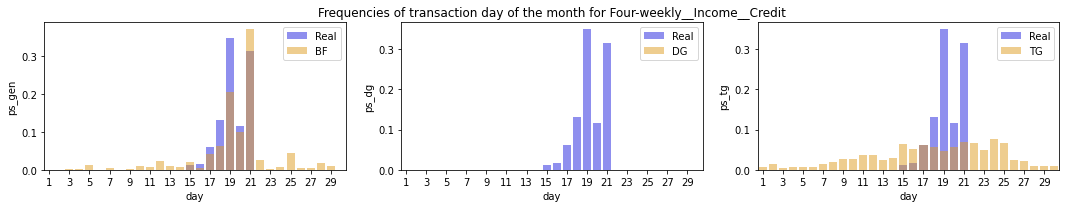

Days of real transaction with tcode = Next Unilimited__Subscription__Debit 0.52% of real data


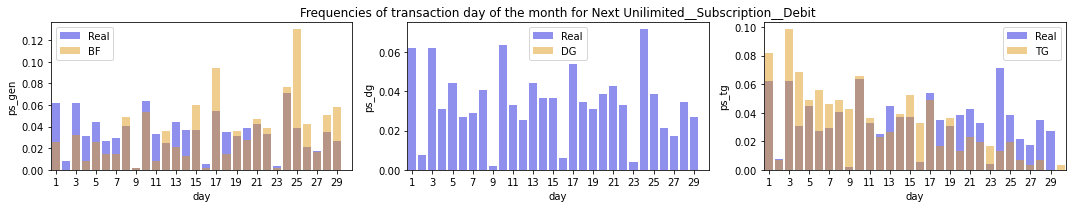

Days of real transaction with tcode = Pact Coffee__Subscription__Debit 0.43% of real data


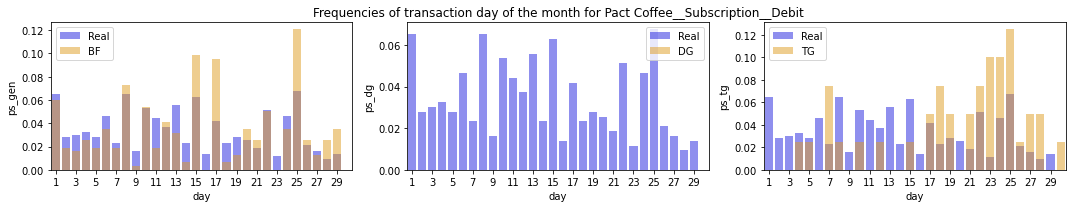

Days of real transaction with tcode = Virgin Mobile Mobile__Utility Bill__Debit 0.40% of real data


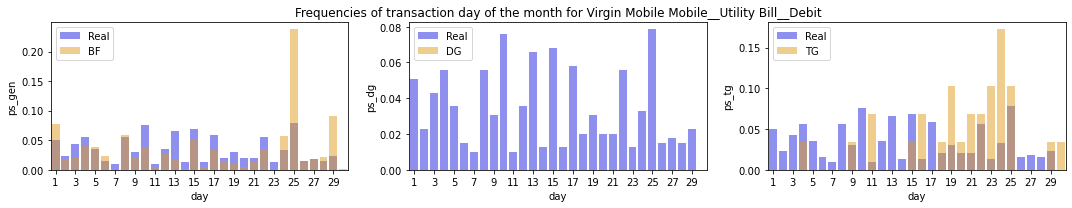

Days of real transaction with tcode = Tipple Box__Subscription__Debit 0.39% of real data


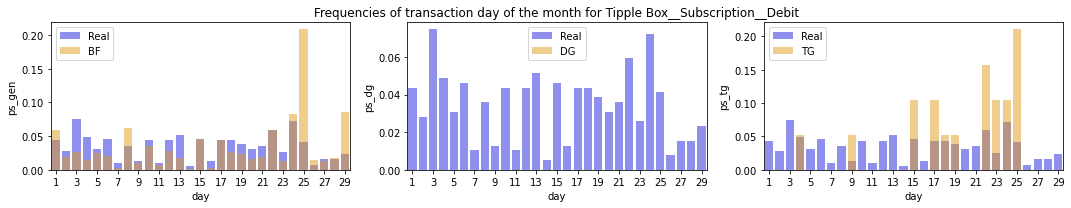

Days of real transaction with tcode = London Tea Club__Subscription__Debit 0.35% of real data


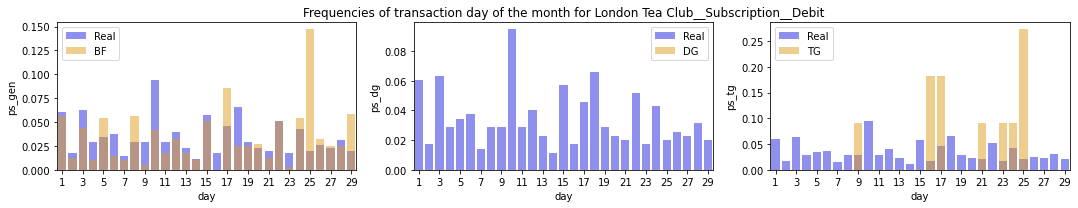

Days of real transaction with tcode = Craft Gin Club__Subscription__Debit 0.27% of real data


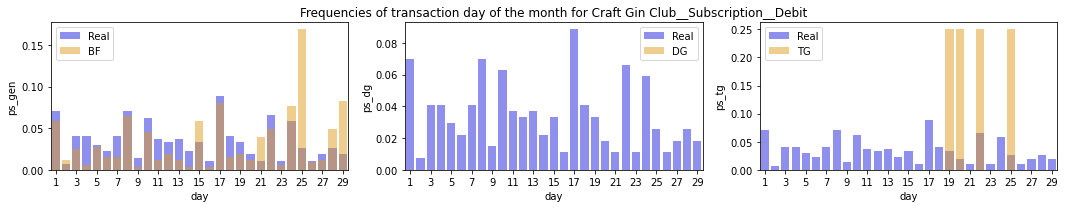

Days of real transaction with tcode = Birch Box__Subscription__Debit 0.23% of real data


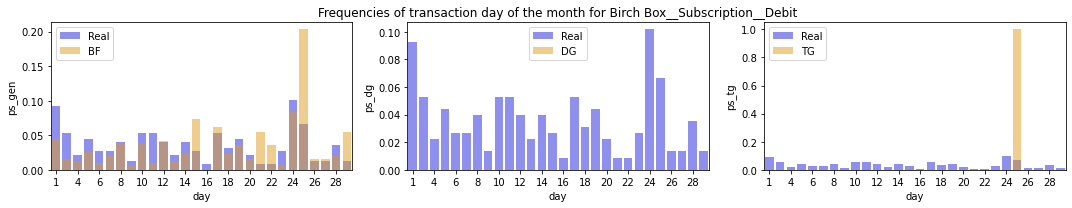

Days of real transaction with tcode = Irregular__Income__Credit 0.20% of real data


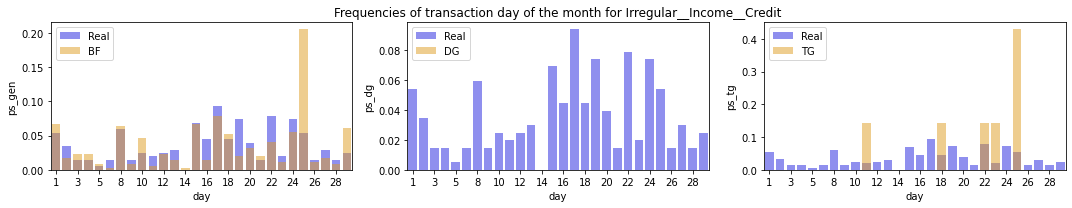

Days of real transaction with tcode = Now TV__Subscription__Debit 0.16% of real data


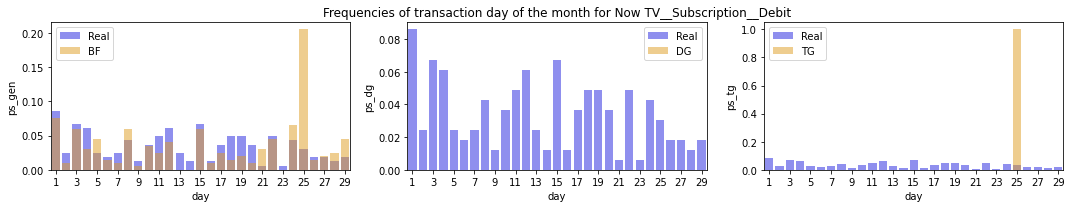

Days of real transaction with tcode = Vodafone Broadband__Utility Bill__Debit 0.16% of real data


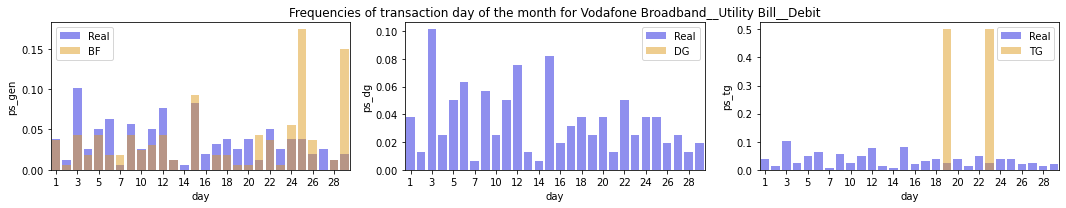

Days of real transaction with tcode = Glossy Box__Subscription__Debit 0.15% of real data


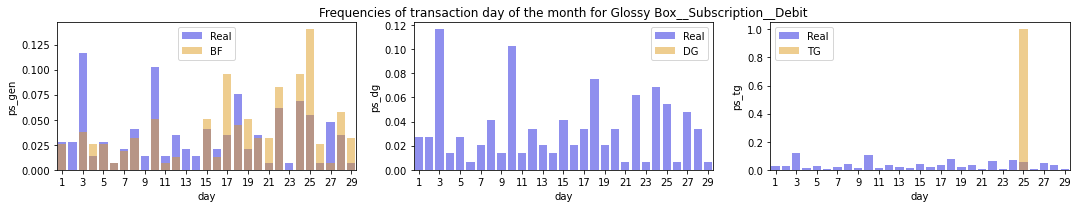

Days of real transaction with tcode = Fortnightly__Income__Credit 0.11% of real data


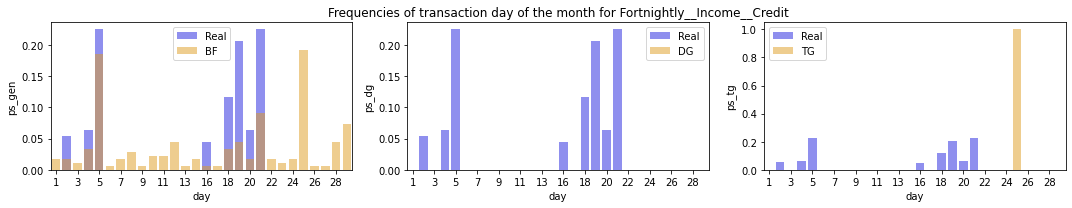

Days of real transaction with tcode = Post Office Broadband__Utility Bill__Debit 0.07% of real data


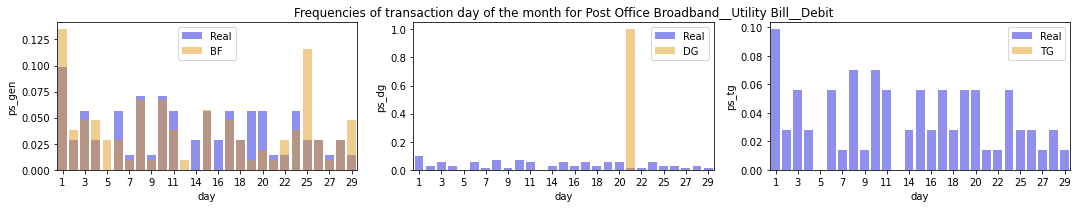

Days of real transaction with tcode = KCOM Broadband__Utility Bill__Debit 0.02% of real data


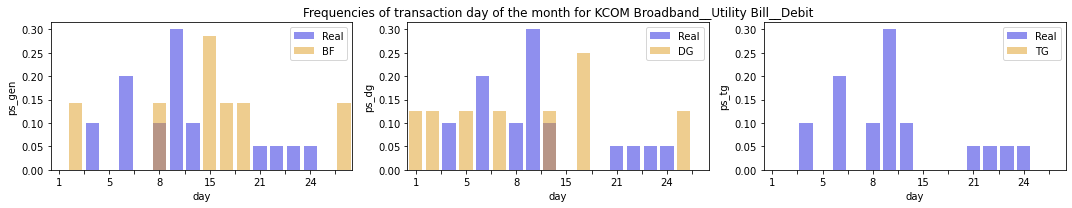

Days of real transaction with tcode = Zen Internet Broadband__Utility Bill__Debit 0.02% of real data


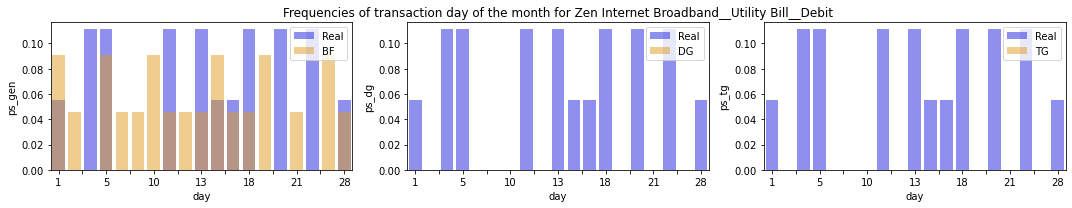

In [132]:
field1 = 'tcode'
field2 = 'day'
plot_sort_by = "counts_real"
plot_n = 32




f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))


# make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, **barplot_params)



combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    gen_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(fgen_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]


for code_1 in f1_opts:
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        gen_df[gen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(fgen_df[fgen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    
    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[2])



    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)

    for i in range(3):

        ax[i].xaxis.set_major_locator(plt.MaxNLocator(16))
        ax[i].legend()

    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    ax[1].set_title(f"Frequencies of transaction day of the month for {code_1}")    


    plt.tight_layout()
    plt.show()


    
    

#             make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, ax=ax[0], **barplot_params)
#             ax[0].legend()


#             plot_ecdf(real_df[real_df[field1]==code_1]['raw_amount'], plot_params={"label":"real"}, ax=ax[2])
#             plot_ecdf(gen_df[gen_df[field1]==code_1]['raw_amount'], plot_params={"label":"gen"}, ax=ax[2])

#             ax[2].legend()
#             ax[2].set_title(f"ECDF") # of amounts with {field1} = {code_1}

#             ax[1].hist(real_df[real_df[field1]==code_1]['raw_amount'], label="real", bins = "auto", density=True, alpha=0.5)
#             ax[1].hist(gen_df[gen_df[field1]==code_1]['raw_amount'], label="gen", bins="auto", density=True, alpha=0.5)

#             ax[1].legend()
#             ax[1].set_title(f"Hist of transaction amounts with \n {field1} = {code_1}")

Dows of real transaction with tcode = Groceries - Food & Drinks__Card Transaction__Debit 24.78% of real data


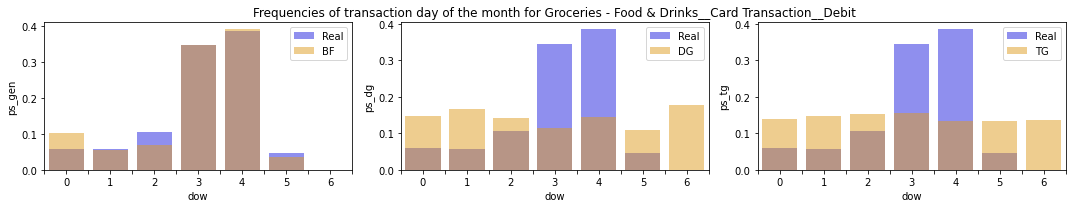

Dows of real transaction with tcode = Water Bill__Utility Bill__Debit 5.93% of real data


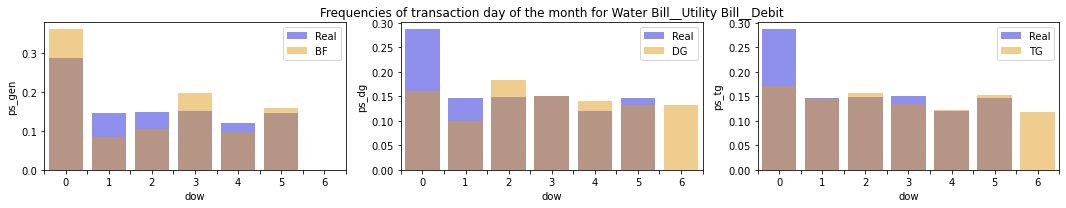

Dows of real transaction with tcode = Energy__Utility Bill__Debit 5.92% of real data


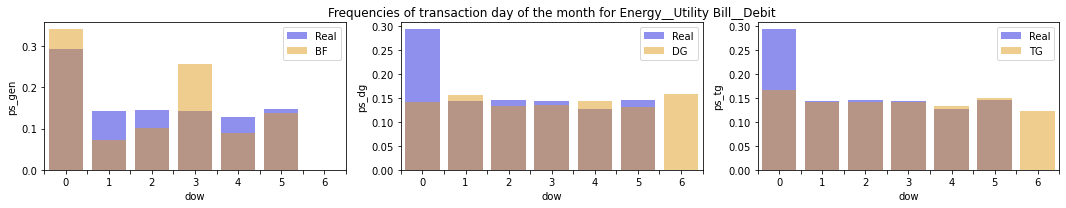

Dows of real transaction with tcode = Monthly__Income__Credit 5.72% of real data


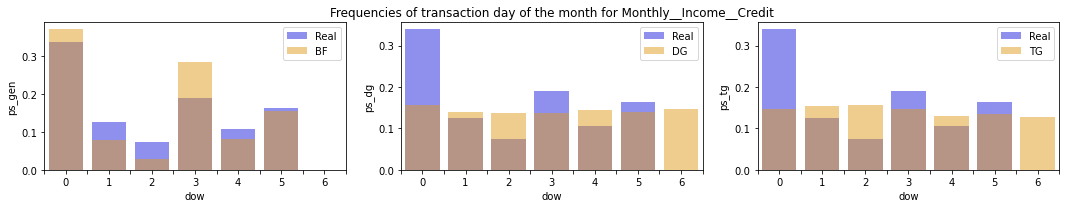

Dows of real transaction with tcode = Bar/Pub__Card Transaction__Debit 5.32% of real data


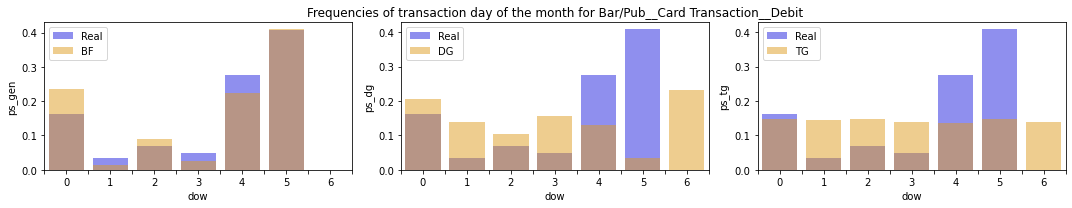

Dows of real transaction with tcode = Restaurant__Card Transaction__Debit 5.28% of real data


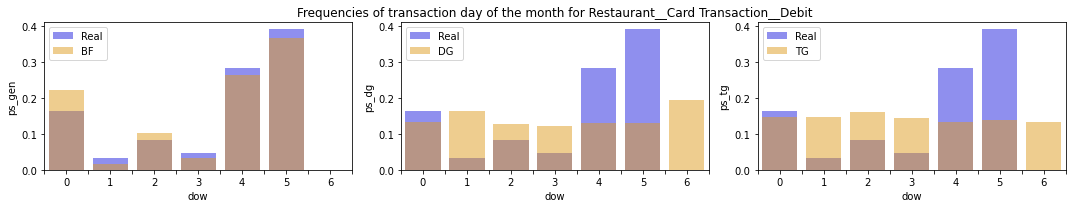

Dows of real transaction with tcode = Public Transport__Card Transaction__Debit 4.33% of real data


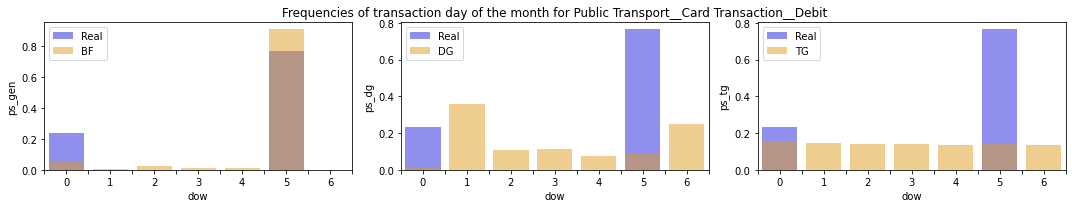

Dows of real transaction with tcode = Credit Card Payment__Credit Card__Debit 3.73% of real data


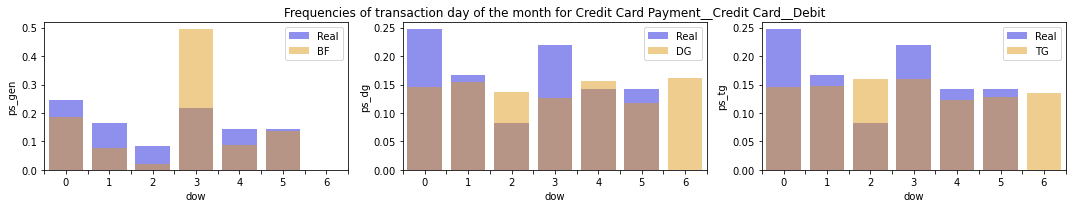

Dows of real transaction with tcode = Mortgage__Utility Bill__Debit 3.26% of real data


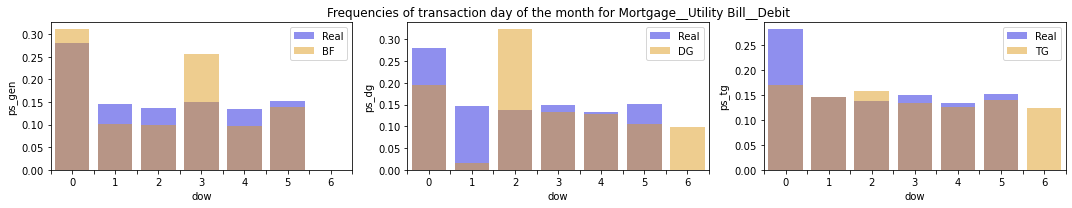

Dows of real transaction with tcode = Rent__Utility Bill__Debit 2.97% of real data


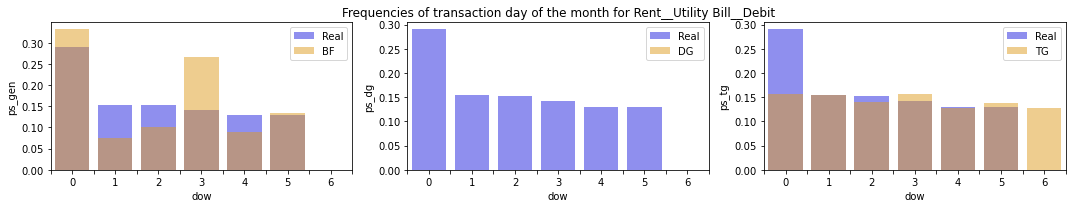

Dows of real transaction with tcode = Amazon Prime__Subscription__Debit 2.96% of real data


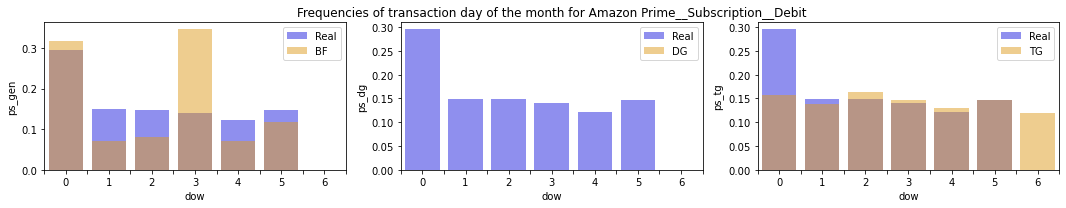

Dows of real transaction with tcode = Gas Station - Car Fuel__Card Transaction__Debit 2.77% of real data


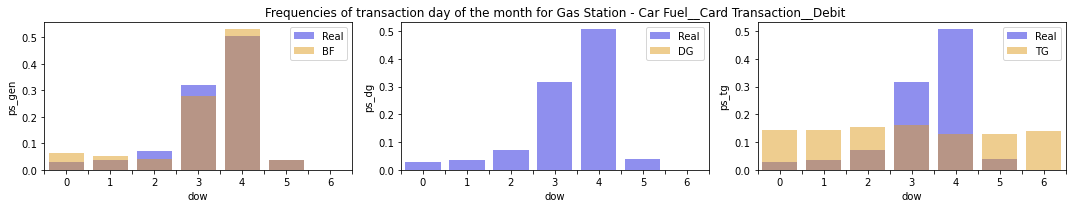

Dows of real transaction with tcode = Cinema/Museum__Card Transaction__Debit 2.27% of real data


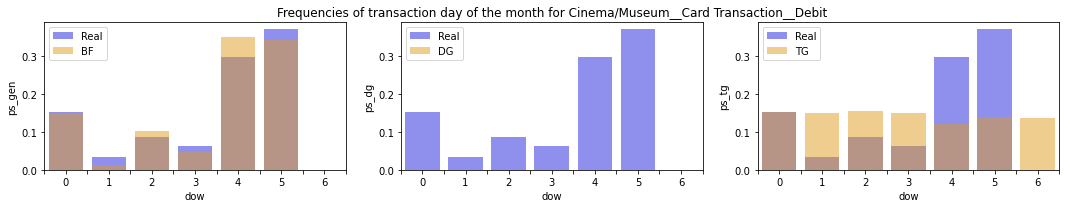

Dows of real transaction with tcode = O2 Mobile__Utility Bill__Debit 2.25% of real data


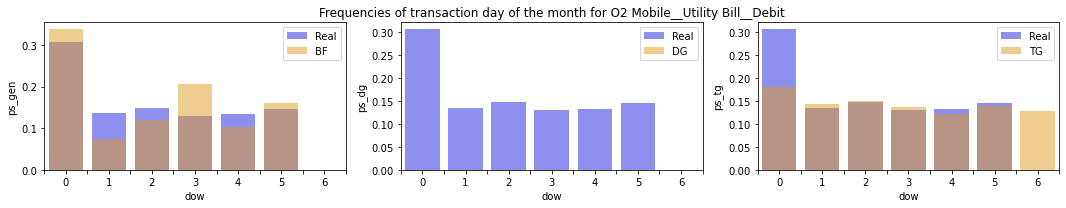

Dows of real transaction with tcode = Shopping - Household Goods__Card Transaction__Debit 2.24% of real data


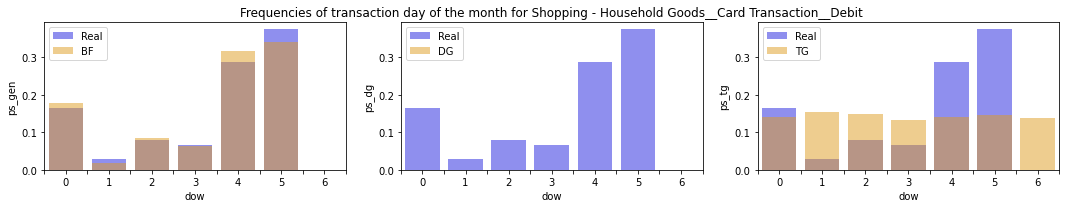

Dows of real transaction with tcode = Shopping - Clothing__Card Transaction__Debit 2.23% of real data


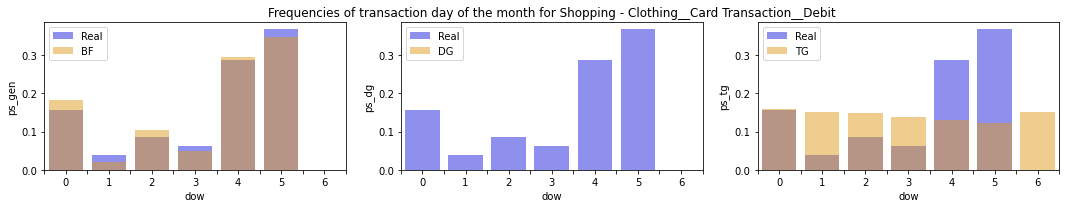

Dows of real transaction with tcode = BT Mobile__Utility Bill__Debit 2.19% of real data


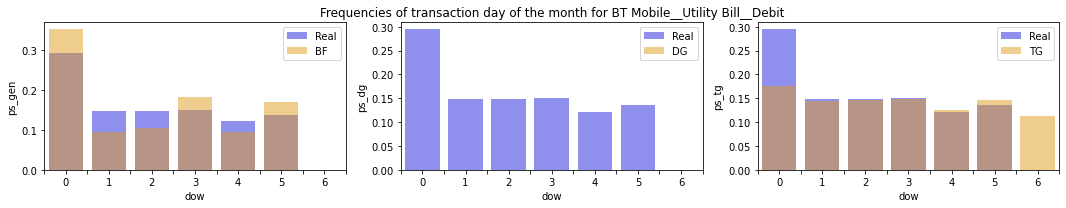

Dows of real transaction with tcode = Vodafone Mobile__Utility Bill__Debit 1.74% of real data


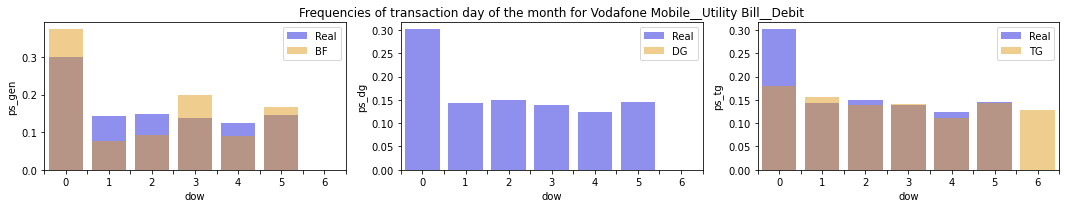

Dows of real transaction with tcode = BT Broadband__Utility Bill__Debit 1.65% of real data


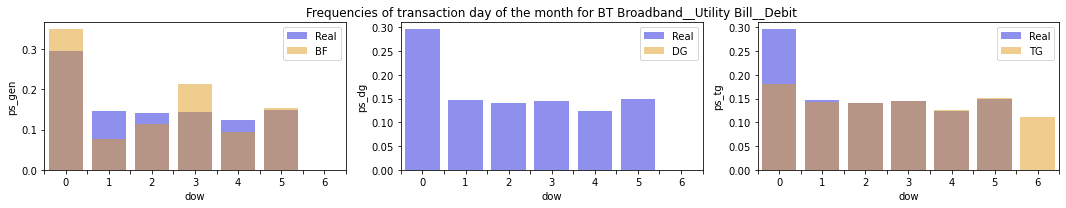

Dows of real transaction with tcode = Netflix__Subscription__Debit 1.32% of real data


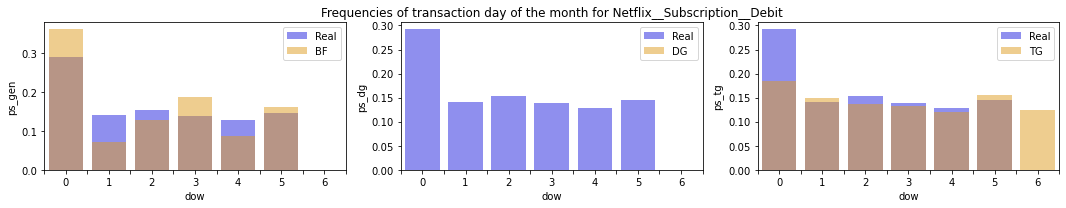

Dows of real transaction with tcode = Sky Broadband__Utility Bill__Debit 1.11% of real data


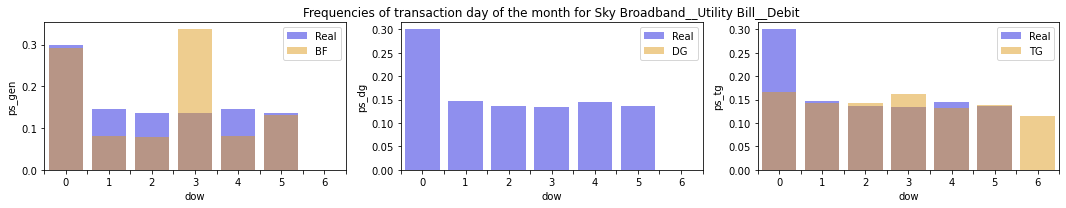

Dows of real transaction with tcode = Virgin Media Broadband__Utility Bill__Debit 1.08% of real data


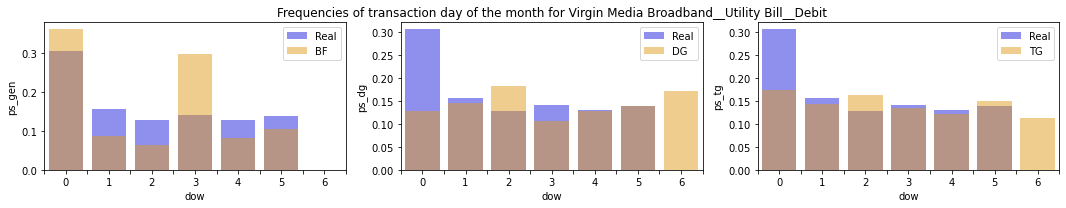

Dows of real transaction with tcode = Three Mobile__Utility Bill__Debit 0.99% of real data


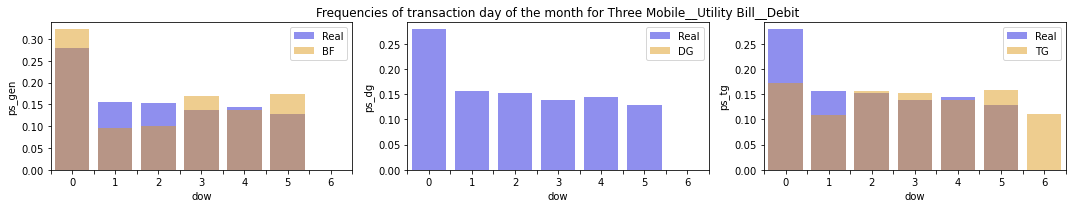

Dows of real transaction with tcode = Weekly__Income__Credit 0.93% of real data


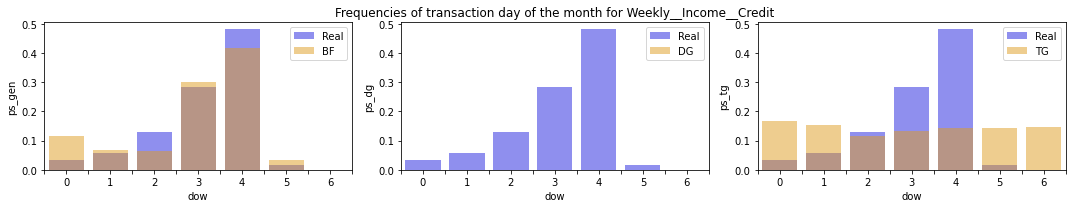

Dows of real transaction with tcode = Sky GO__Subscription__Debit 0.87% of real data


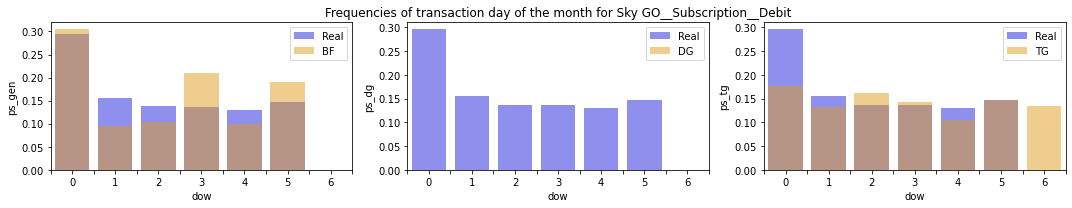

Dows of real transaction with tcode = TalkTalk Broadband__Utility Bill__Debit 0.82% of real data


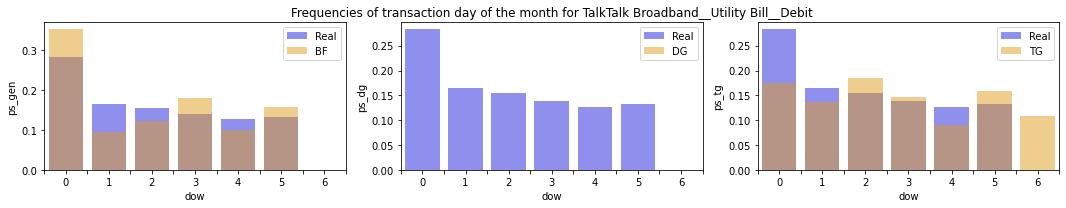

Dows of real transaction with tcode = Graze__Subscription__Debit 0.63% of real data


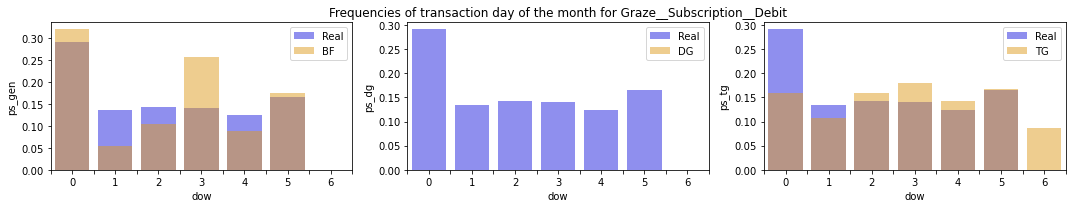

Dows of real transaction with tcode = Tesco Mobile Mobile__Utility Bill__Debit 0.63% of real data


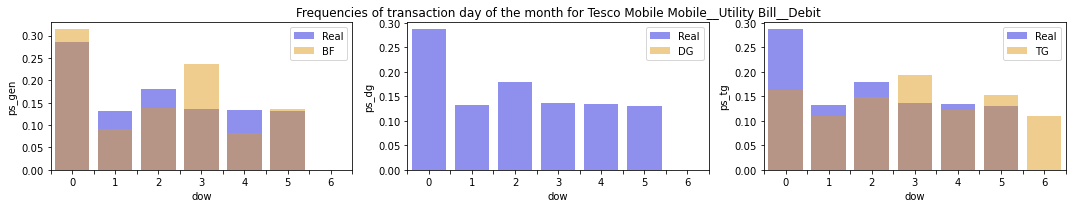

Dows of real transaction with tcode = Four-weekly__Income__Credit 0.61% of real data


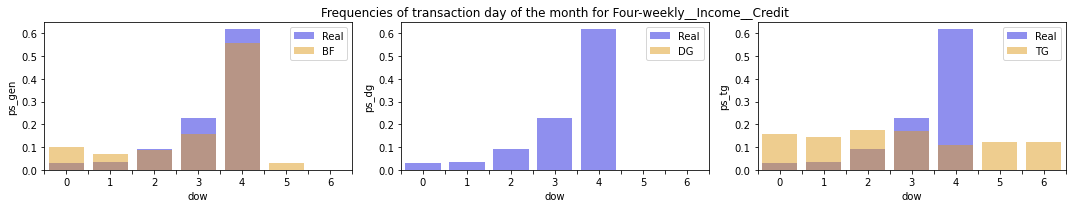

Dows of real transaction with tcode = Next Unilimited__Subscription__Debit 0.52% of real data


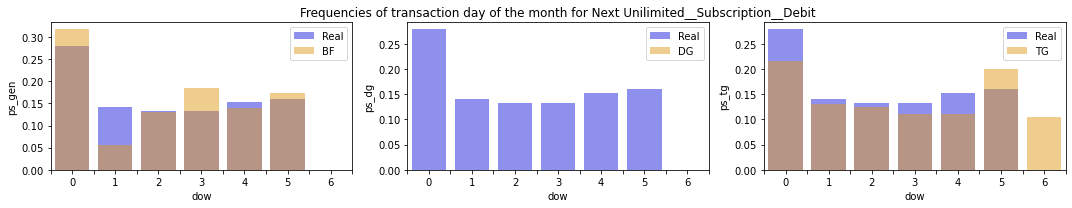

Dows of real transaction with tcode = Pact Coffee__Subscription__Debit 0.43% of real data


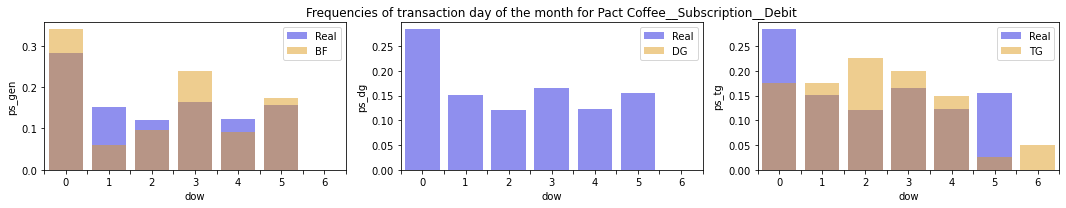

Dows of real transaction with tcode = Virgin Mobile Mobile__Utility Bill__Debit 0.40% of real data


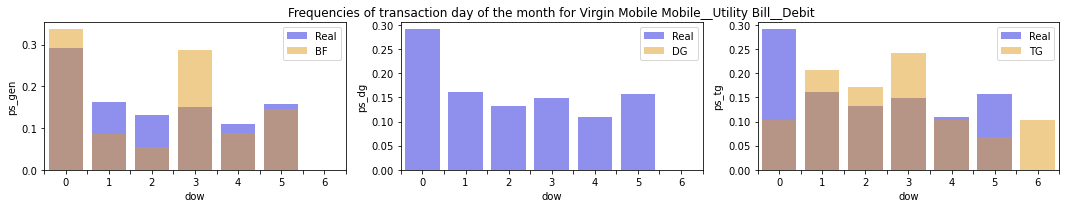

Dows of real transaction with tcode = Tipple Box__Subscription__Debit 0.39% of real data


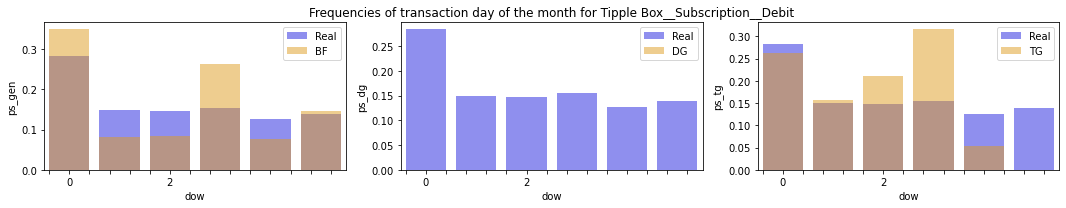

Dows of real transaction with tcode = London Tea Club__Subscription__Debit 0.35% of real data


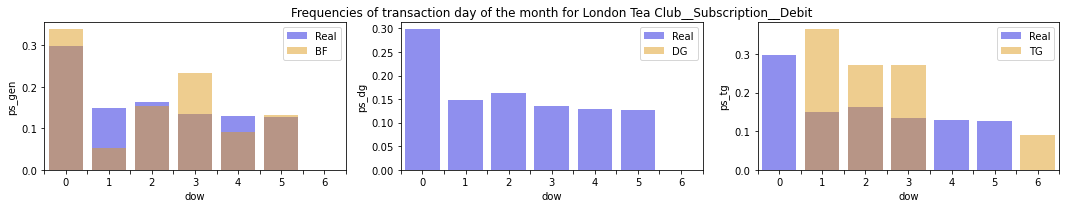

Dows of real transaction with tcode = Craft Gin Club__Subscription__Debit 0.27% of real data


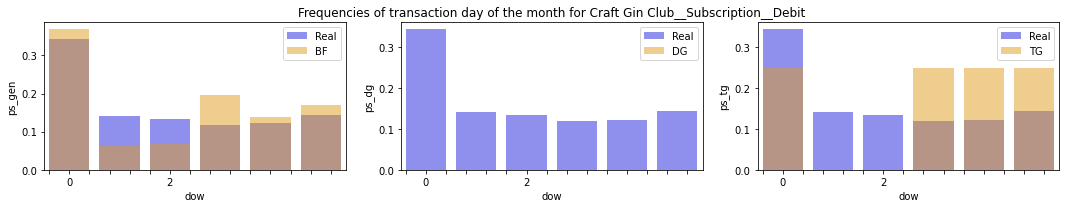

Dows of real transaction with tcode = Birch Box__Subscription__Debit 0.23% of real data


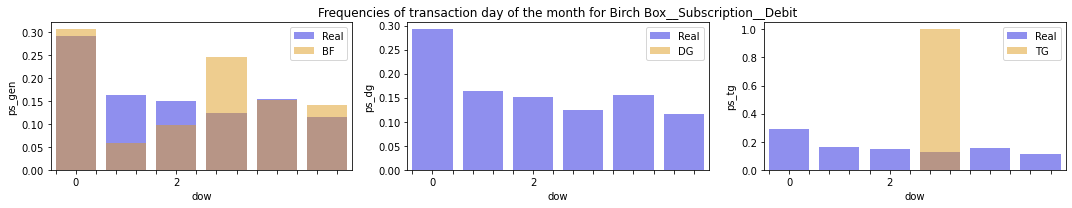

Dows of real transaction with tcode = Irregular__Income__Credit 0.20% of real data


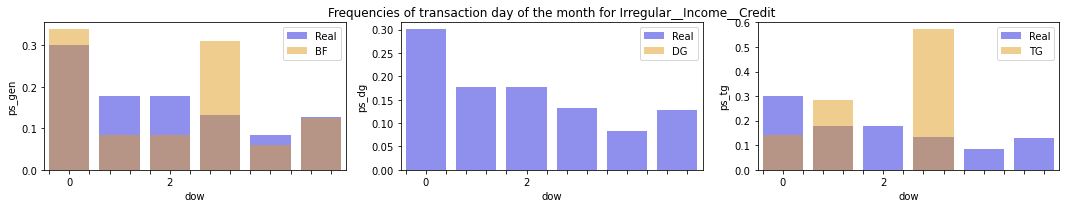

Dows of real transaction with tcode = Now TV__Subscription__Debit 0.16% of real data


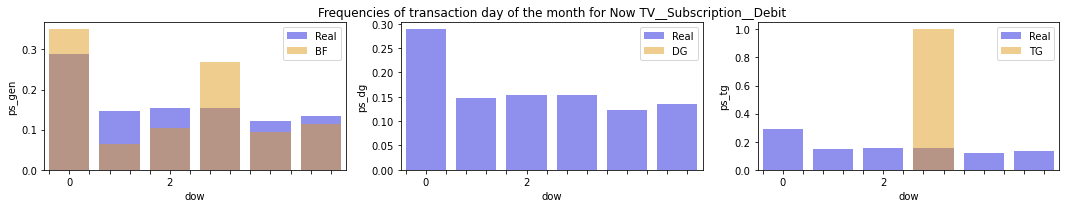

Dows of real transaction with tcode = Vodafone Broadband__Utility Bill__Debit 0.16% of real data


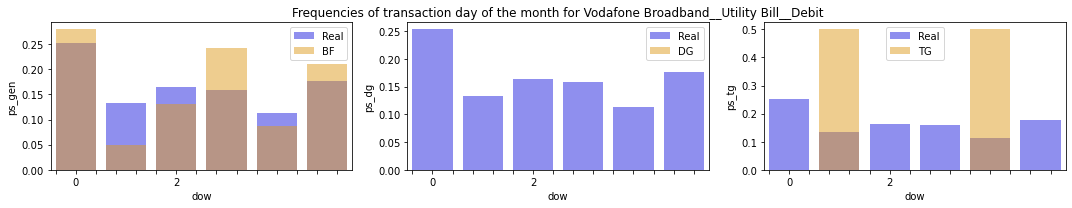

Dows of real transaction with tcode = Glossy Box__Subscription__Debit 0.15% of real data


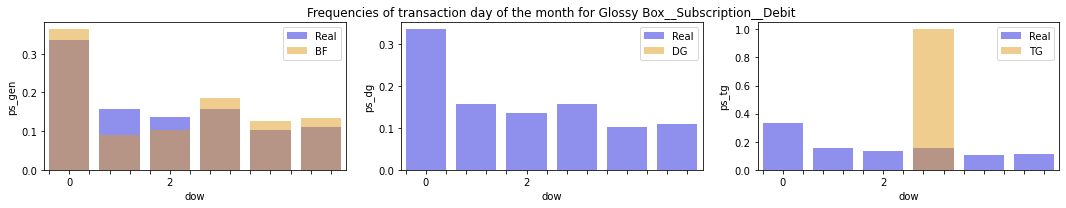

Dows of real transaction with tcode = Fortnightly__Income__Credit 0.11% of real data


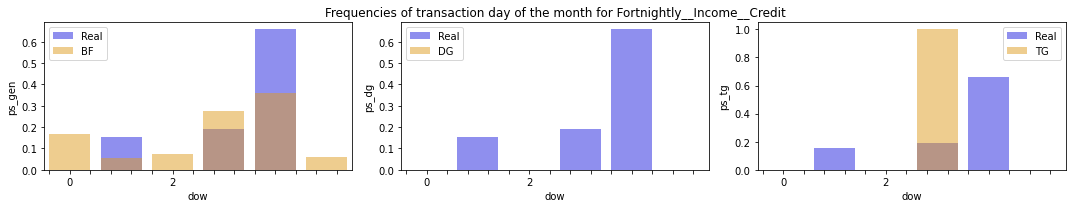

Dows of real transaction with tcode = Post Office Broadband__Utility Bill__Debit 0.07% of real data


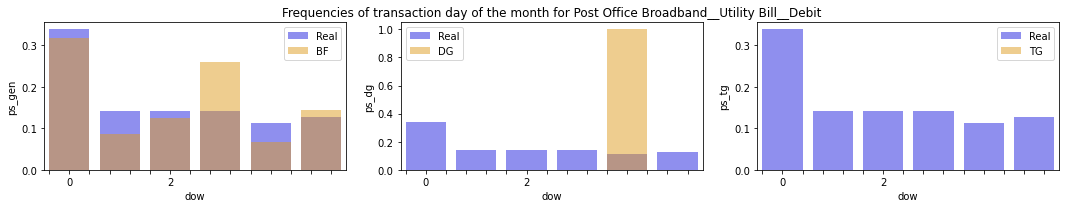

Dows of real transaction with tcode = KCOM Broadband__Utility Bill__Debit 0.02% of real data


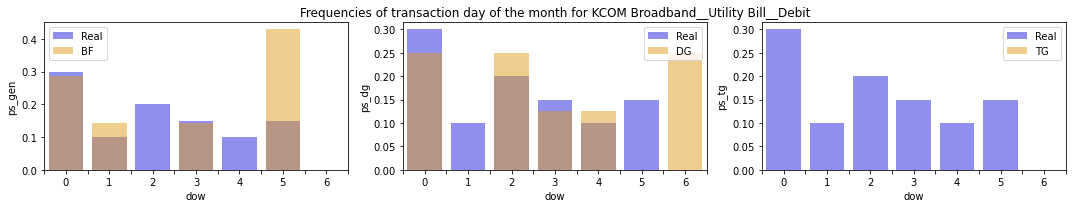

Dows of real transaction with tcode = Zen Internet Broadband__Utility Bill__Debit 0.02% of real data


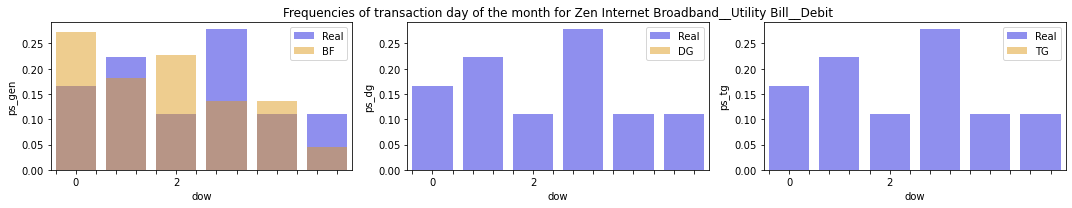

In [133]:
field1 = 'tcode'
field2 = 'dow'
plot_sort_by = "counts_real"
plot_n = 32




f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))


# make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, **barplot_params)



combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    gen_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(fgen_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]


for code_1 in f1_opts:
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        gen_df[gen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(fgen_df[fgen_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    
    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[2])



    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)

    for i in range(3):

        ax[i].xaxis.set_major_locator(plt.MaxNLocator(16))
        ax[i].legend()

    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    ax[1].set_title(f"Frequencies of transaction day of the month for {code_1}")    


    plt.tight_layout()
    plt.show()


    
    

#             make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, ax=ax[0], **barplot_params)
#             ax[0].legend()


#             plot_ecdf(real_df[real_df[field1]==code_1]['raw_amount'], plot_params={"label":"real"}, ax=ax[2])
#             plot_ecdf(gen_df[gen_df[field1]==code_1]['raw_amount'], plot_params={"label":"gen"}, ax=ax[2])

#             ax[2].legend()
#             ax[2].set_title(f"ECDF") # of amounts with {field1} = {code_1}

#             ax[1].hist(real_df[real_df[field1]==code_1]['raw_amount'], label="real", bins = "auto", density=True, alpha=0.5)
#             ax[1].hist(gen_df[gen_df[field1]==code_1]['raw_amount'], label="gen", bins="auto", density=True, alpha=0.5)

#             ax[1].legend()
#             ax[1].set_title(f"Hist of transaction amounts with \n {field1} = {code_1}")

In [ ]:
combo_df

In [ ]:
    

# combo_df.rename(columns={"index":field})
    
for version in ["real", 'gen', 'dg', 'tg']:
    
    combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                    inplace=True)
    
    combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])
    
    
combo_df = combo_df.rename(columns={"index":field2}).sort_values(by=plot_sort_by, ascending=False)

combo_df

In [ ]:

fig, ax = plt.subplots(1,3, figsize = (15, 3))

barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[0])
barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[1])
barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[1])


barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[2])
barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[2])



# tick_lbls = False
# if not tick_lbls:
#     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
# else:
#     for item in barplt.get_xticklabels():
#         item.set_rotation(90)

for i in range(3):

    ax[i].xaxis.set_major_locator(plt.MaxNLocator(16))
    ax[i].legend()

# plt.title(f"Frequencies of top {plot_n} {field2}s")    
ax[1].set_title(f"Frequencies of transaction day of the month for {code_1}")    


plt.tight_layout()
plt.show()


In [ ]:

def make_barplot(real_df, gen_df, field, plot_n = 30, plot_sort_by = "counts_real", tick_lbls= False, ax=None):

    combo_df = pd.merge(real_df[field].value_counts().reset_index(), 
                        gen_df[field].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)
    
    combo_df.rename(columns={"index":field,
                            field + "_real": "counts_real",
                            field + "_gen": "counts_gen",}, inplace=True)

    combo_df["ps_real"] = combo_df["counts_real"] / np.sum(combo_df["counts_real"])

    combo_df["ps_gen"] = combo_df["counts_gen"] / np.sum(combo_df["counts_gen"])

    if ax is None:
        plt.figure(figsize=(14,6))

    combo_df = combo_df.sort_values(by=plot_sort_by, ascending=False)

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field, y="ps_real", color="b", alpha=0.5, label="real", ax=ax)
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field, y="ps_gen", color="orange", alpha=0.5, label="gen", ax=ax)


    if not tick_lbls:
        barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    else:
        for item in barplt.get_xticklabels():
            item.set_rotation(90)

    plt.title(f"Frequencies of top {plot_n} {field}s")    
    



def compute_2d_categorical_metrics(real_df, gen_df, field1, field2, pseudo_counts = 0.0, plot = False, barplot_params = {}, 
                                   compute_cont_metrics = True, plot_ecdfs = False, plot_ecdf_params = {}):


    f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))
    f2_opts = set(real_df[field2].unique()).union(set(gen_df[field2].unique()))

    n_opts_total = len(f1_opts) * len(f2_opts)


    kl_r_m = 0.
    kl_g_m = 0.
    entr_r = 0.
    entr_g = 0.
    l1_d = 0.
    l2_d = 0.
    count_g = 0.
    count_r = 0.
    
    observed_opts = 0
    
    cont_metric_results = {}
    
    
    for code_1 in f1_opts:
        
        if plot:
            print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
            if plot_ecdfs:
                fig, ax = plt.subplots(1, 3, figsize=(24,7), gridspec_kw={'width_ratios': [3, 1, 1]})
#                 fig, ax = plt.subplots(1, 2, figsize=(20,7), gridspec_kw={'width_ratios': [3, 1]})
                
                make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, ax=ax[0], **barplot_params)
                ax[0].legend()
            
            
                plot_ecdf(real_df[real_df[field1]==code_1]['raw_amount'], plot_params={"label":"real"}, ax=ax[2])
                plot_ecdf(gen_df[gen_df[field1]==code_1]['raw_amount'], plot_params={"label":"gen"}, ax=ax[2])
                
                ax[2].legend()
                ax[2].set_title(f"ECDF") # of amounts with {field1} = {code_1}
                
                ax[1].hist(real_df[real_df[field1]==code_1]['raw_amount'], label="real", bins = "auto", density=True, alpha=0.5)
                ax[1].hist(gen_df[gen_df[field1]==code_1]['raw_amount'], label="gen", bins="auto", density=True, alpha=0.5)

                ax[1].legend()
                ax[1].set_title(f"Hist of transaction amounts with \n {field1} = {code_1}")

            else:
                make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, **barplot_params)
                ax = [None, None]
                
            plt.show()
                
#             make_barplot(real_df[real_df[field1]==code_1], gen_df[gen_df[field1]==code_1], field=field2, ax=ax, **barplot_params)


# New - check non-memorization

In [ ]:
gb_real = real_df[["account_id", "amount", "tcode", "days_passed"]].groupby("account_id")
gb_gen = gen_df[["account_id", "amount", "tcode", "days_passed"]].groupby("account_id")

In [ ]:
for _, dfr in gb_real:
    rdata = dfr.to_numpy()[:,[1,2]]
    for _, dfg in gb_gen:
        gdata = dfg.to_numpy()[:,[1,2]]
    break

In [ ]:
window = 5
alpha = 0.05


# match = False
start_time = time.time()

n_compares = 0
n_tcode_seq_match = 0
n_real_df = 0

matches_at = []

for dfr_count, (dfr_i, dfr) in enumerate(gb_real):
    n_real_df +=1 
    if n_real_df % 250 == 0:
        print("Begin with real df", dfr_count, f"{n_real_df} complete out of {len(gb_real)}")
        print(f"Time so far {time.time() - start_time:.2f}  ({(time.time() - start_time) / (n_real_df):.2f})" )
    rdata = dfr.to_numpy()[:,[1,2]]
    ramt = rdata[:,0].astype(float)
    rcode = rdata[:,1]
    
    
    for dfg_i, dfg in gb_gen:
        gdata = dfg.to_numpy()[:,[1,2]]
        gamt = gdata[:,0].astype(float)
        gcode = gdata[:,1]
        
        
        for ri in range(len(rdata)-window+1):
            for gi in range(len(gdata)-window+1):
                n_compares += 1
                
#                 if len(rcode[ri:ri+window]) == len(gcode[gi:gi+window]):
#                     print("good")
#                 else:
#                     print("Bad", ri, gi, window, len(rcode[ri:ri+window]), len(gcode[gi:gi+window]), len(rdata))
                if np.all(rcode[ri:ri+window] == gcode[gi:gi+window]):
#                     print("Match tcodes!")
                    n_tcode_seq_match += 1 
    

            
            
                    if np.allclose(ramt[ri:ri+window], gamt[gi:gi+window], rtol=alpha, atol=0.0):
                        print("Match tcodes and amounts !")
                        print(f"Took {time.time() - start_time:.2f} secs to find match!")
                        
                        matches_at.append((dfr_count, dfr_i, dfr, dfg_i, dfg, ri, gi ))
                        
#                         raise("quit")
                

In [ ]:
n_compares, n_tcode_seq_match, n_real_df

In [ ]:
n_tcode_seq_match / n_compares *100

In [ ]:
len(matches_at)

In [ ]:
2 /  n_compares *100

## BF result

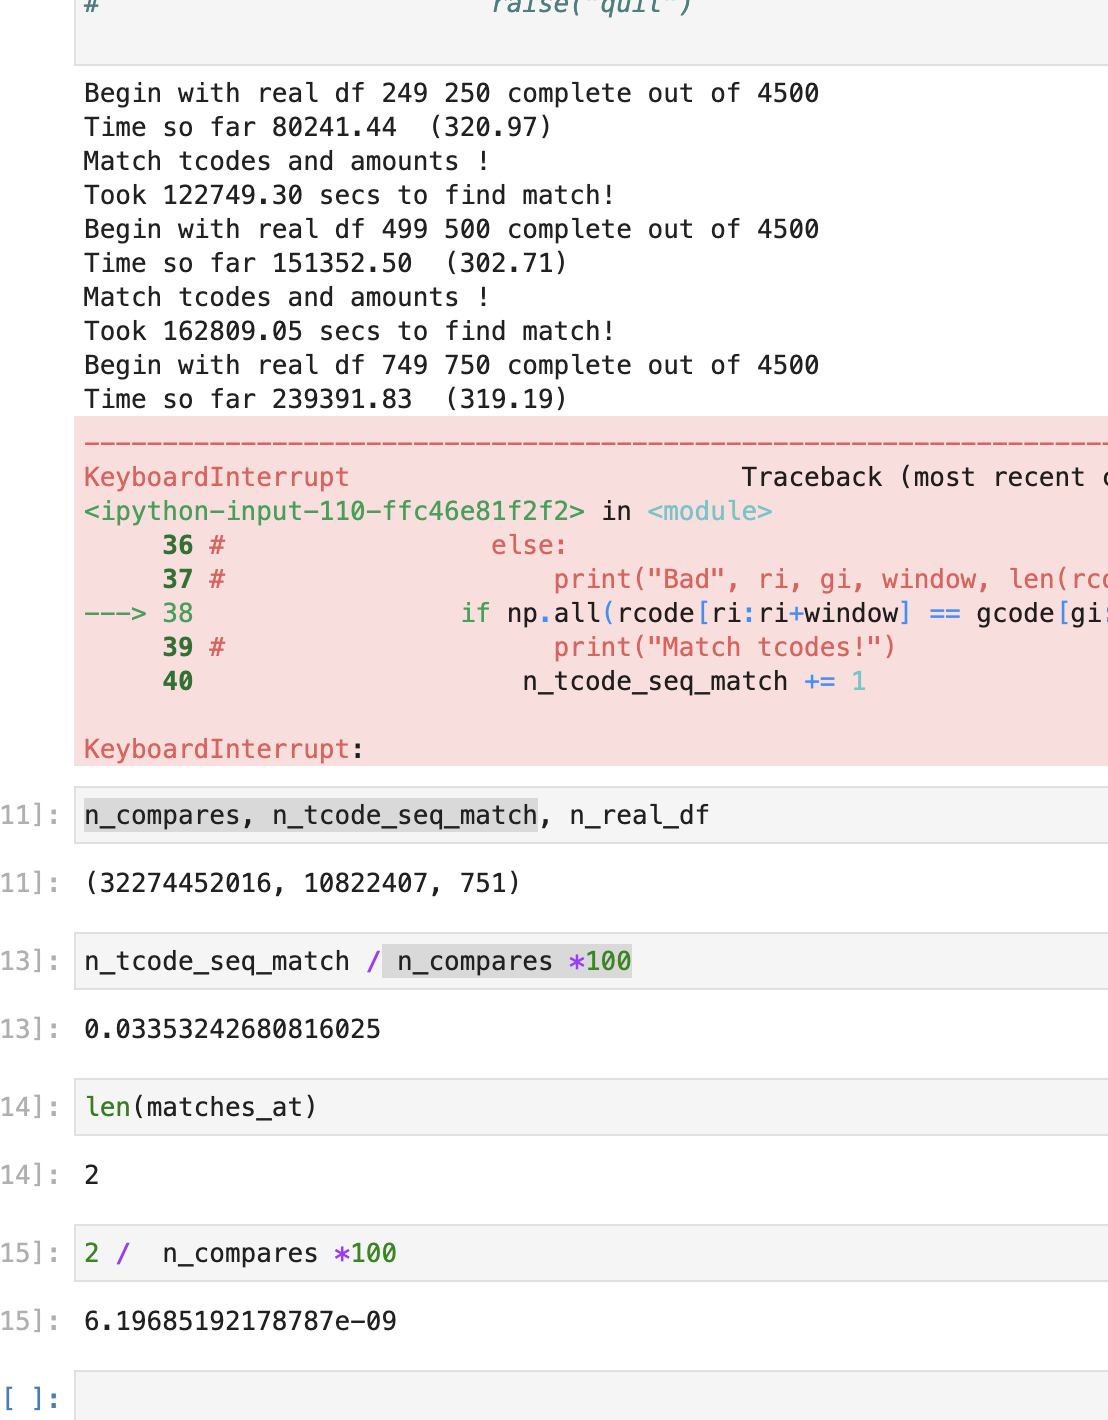

In [118]:
gb_fgen = fgen_df[["account_id", "amount", "tcode", "days_passed"]].groupby("account_id")

In [119]:
window = 5
alpha = 0.05


# match = False
start_time = time.time()

n_compares = 0
n_tcode_seq_match = 0
n_real_df = 0

matches_at = []

for dfr_count, (dfr_i, dfr) in enumerate(gb_real):
    n_real_df +=1 
    if n_real_df % 250 == 0:
        print("Begin with real df", dfr_count, f"{n_real_df} complete out of {len(gb_real)}")
        print(f"Time so far {time.time() - start_time:.2f}  ({(time.time() - start_time) / (n_real_df):.2f})" )
    rdata = dfr.to_numpy()[:,[1,2]]
    ramt = rdata[:,0].astype(float)
    rcode = rdata[:,1]
    
    
    for dfg_i, dfg in gb_fgen:
        gdata = dfg.to_numpy()[:,[1,2]]
        gamt = gdata[:,0].astype(float)
        gcode = gdata[:,1]
        
        
        for ri in range(len(rdata)-window+1):
            for gi in range(len(gdata)-window+1):
                n_compares += 1
                
#                 if len(rcode[ri:ri+window]) == len(gcode[gi:gi+window]):
#                     print("good")
#                 else:
#                     print("Bad", ri, gi, window, len(rcode[ri:ri+window]), len(gcode[gi:gi+window]), len(rdata))
                if np.all(rcode[ri:ri+window] == gcode[gi:gi+window]):
#                     print("Match tcodes!")
                    n_tcode_seq_match += 1 
    

            
            
                    if np.allclose(ramt[ri:ri+window], gamt[gi:gi+window], rtol=alpha, atol=0.0):
                        print("Match tcodes and amounts !")
                        print(f"Took {time.time() - start_time:.2f} secs to find match!")
                        
                        matches_at.append((dfr_count, dfr_i, dfr, dfg_i, dfg, ri, gi ))
                        
#                         raise("quit")
                

KeyboardInterrupt: 

In [120]:
n_compares, n_tcode_seq_match, n_real_df

(31256357834, 19304491, 144)

In [121]:
n_tcode_seq_match / n_compares *100

0.06176180571813453

In [122]:
len(matches_at)

0

In [123]:
2 /  n_compares *100

6.398698180452883e-09

In [ ]:
n_compares / 10**9

In [ ]:
n_compares, n_tcode_seq_match, n_real_df

In [ ]:
ramt[ri:ri+window], gamt[gi:gi+window]

In [ ]:
np.allclose(ramt[ri:ri+window], gamt[gi:gi+window])

In [ ]:
rdata[ri:ri+window,0] , gdata[gi:gi+window, 0]

In [ ]:
np.allclose(rdata[ri:ri+window,0].astype(float) , gdata[gi:gi+window, 0].astype(float), atol=0, rtol=0.05)

In [ ]:
rdata[ri:ri+window, 1] == gdata[gi:gi+window, 1]

In [ ]:
rdata[ri:ri+window] , gdata[gi:gi+window]

In [ ]:
dfr[["amount", "tcode"]]

In [ ]:
rdata

In [ ]:
rdata.shape

In [ ]:
len(rdata)

In [ ]:
for ri in range(len(rdata)-window+1):
    rdata[ri:ri+window]
    for gi in range(len(rdata)-window+1):
        
        if np.all(rdata[ri:ri+window, 1] == gdata[gi:gi+window, 1]):
            print("Match !!")

In [ ]:
len(rdata[ri:ri+window, 1])

In [ ]:
np.all(rdata[ri:ri+window, 1] == gdata[gi:gi+window, 1])

In [ ]:
dfg[["amount", "tcode"]].iloc[gi:gi+window].asarray()

In [ ]:
dfr.to_numpy()